In [1]:
from my_model import *
from my_data import *
from my_plot import *
import seaborn as sns
from sklearn.metrics import explained_variance_score, r2_score
from datetime import datetime

2025-11-13 15:58:06.445643: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 15:58:06.446095: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-13 15:58:06.489620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 15:58:07.526463: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
def tprint(*args, **kwargs):  
    """  
    Print function with timestamp prefix.  
    
    Args:  
        *args: Variable length argument list to print  
        **kwargs: Arbitrary keyword arguments (same as print function)  
    
    Example:  
        tprint("Hello, World!")  
        tprint("Processing item:", 42)  
    """  
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]  
    print(f"[{timestamp}]", *args, **kwargs)  

In [3]:
# 1. Set a global seed.
SEED = 1234  

# 2. OS Level: Guaranteeing that Python hashes are also reproducible  
os.environ['PYTHONHASHSEED'] = str(SEED)  

# 3. Make the underlying ops of TF use deterministic implementations as much as possible (2.x). 
os.environ['TF_DETERMINISTIC_OPS']    = '1'  
os.environ['TF_CUDNN_DETERMINISM']    = '1'  

# 4. Python comes with random built-in.
random.seed(SEED)  
# 5. NumPy  
np.random.seed(SEED)  
# 6. TensorFlow  
tf.random.set_seed(SEED) 

#parametre
batch_size = 8

In [4]:
tprint('Read data')

tprint('trainingset')
#Read data
data = prepare_training_data("berlin_linkstats/train",
network_pattern_mid="network_berlin", ls_pattern_mid=".linkstats_berlin")  
tprint('validation set')
data_val = prepare_training_data("berlin_linkstats/val",
network_pattern_mid="network_berlin", ls_pattern_mid=".linkstats_berlin")  

tprint('Read data complete')

[2025-11-13 15:58:26.941] Read data
[2025-11-13 15:58:26.941] trainingset
new


2025-11-13 15:58:34.514449: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
[2025-11-13 16:56:46.366] validation set
new

In [5]:
tprint('Data Preprocessing')
#Data Normalization
#info = get_data_info(data) #cr2

dico_transf = dict()
dico_transf['length'] = tf.math.log1p
dico_transf['freespeed'] = lambda x : 1 - 1/x
dico_transf['capacity'] = tf.math.log1p
dico_transf['permlanes'] = tf.math.log1p
dico_transf['base_hrs_avg'] = tf.math.log1p
dico_transf['label'] = tf.math.log1p

data_t = transform_data(data=data,dico_transformer=dico_transf)
data_t
info_t = get_data_info(data_t)

dico_scaler = dict()
dico_scaler['length'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='min', scale='range', feat_name=feat_name)  
dico_scaler['freespeed'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='min', scale='range', feat_name=feat_name)  
dico_scaler['capacity'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='min', scale='range', feat_name=feat_name)  
dico_scaler['permlanes'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='min', scale='range', feat_name=feat_name)  
dico_scaler['xf'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='avg', scale='std', feat_name=feat_name)  
dico_scaler['yf'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='avg', scale='std', feat_name=feat_name)  
dico_scaler['xt'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='avg', scale='std', feat_name=feat_name)  
dico_scaler['yt'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='avg', scale='std', feat_name=feat_name)  
dico_scaler['base_hrs_avg'] = lambda gt, stats, feat_name: linear_scaler_feat(data=gt, stats=stats, center='min', scale='range', feat_name=feat_name)  
dico_scaler['label'] = lambda lt, stats: linear_scaler_lab(data=lt,stats=stats,center='min',scale='range')

data_s = scale_data(data=data_t,dico_scaler=dico_scaler,dico_info=info_t)
#info_s = get_data_info(data_s)

data_val_t = transform_data(data=data_val,dico_transformer=dico_transf) #cr1
info_val_t = get_data_info(data_val_t)
data_val_s = scale_data(data=data_val_t,dico_scaler=dico_scaler,dico_info=info_val_t)
#info_val_s = get_data_info(data_val_s)



#mini batch
ds_nor = build_dataset(data_s)
ds_val_nor = build_dataset(data_val_s)
train_dataset_nor = ds_nor
train_ds_batched_nor = train_dataset_nor.shuffle(buffer_size=3,seed=SEED).batch(batch_size=batch_size).repeat()

tprint('Data preprocessing completed')

[2025-11-13 17:16:15.293] Data Preprocessing
[2025-11-13 17:17:15.369] Data preprocessing completed


In [6]:
info_val_t

{'label': {'min': 0.0,
  'max': 6.052089214324951,
  'range': 6.052089214324951,
  'avg': 0.34055633680115366,
  'var': 0.7053092446972489,
  'std': 0.839826913534717,
  'q1': 0.0,
  'q2': 0.0,
  'q3': 0.0,
  'iqr': 0.0},
 'length': {'min': 2.4849066734313965,
  'max': 11.15129566192627,
  'range': 8.666388988494873,
  'avg': 6.457005501336415,
  'var': 1.3051790958667322,
  'std': 1.142444351321644,
  'q1': 5.617334842681885,
  'q2': 6.373319149017334,
  'q3': 7.286191940307617,
  'iqr': 1.6688570976257324},
 'freespeed': {'min': 0.2799539566040039,
  'max': 0.993571400642395,
  'range': 0.7136174440383911,
  'avg': 0.9355663885230477,
  'var': 0.00040989381867723905,
  'std': 0.020245834600658947,
  'q1': 0.9279995560646057,
  'q2': 0.9279995560646057,
  'q3': 0.9549999833106995,
  'iqr': 0.02700042724609375},
 'capacity': {'min': 5.707110404968262,
  'max': 13.795309066772461,
  'range': 8.0881986618042,
  'avg': 9.41968858973677,
  'var': 0.14434796385199486,
  'std': 0.37993152521

In [7]:
#model
model_input_graph_spec, label_spec = train_dataset_nor.element_spec
del label_spec  # Delete unused tag specifications

# Build model
model_nor = build_regression_model(
    graph_tensor_spec=model_input_graph_spec,
    node_dim=128,
    edge_dim=32,
    message_dim=128,
    next_state_dim=128,
    output_dim=25,  
    num_message_passing=3,
    l2_regularization=5e-5,
    dropout_rate=0.01, )

# Compile model
model_nor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError()
    ]
)

# Print model structure
model_nor.summary()

f =  KerasTensor(type_spec=TensorSpec(shape=(27664, 33), dtype=tf.float32, name=None), name='tf.concat/concat:0', description="created by layer 'tf.concat'")
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [()]                      0         
                                                                 
 input.merge_batch_to_compo  ()                        0         
 nents (InstanceMethod)                                          
                                                                 
 map_features (MapFeatures)  ()                        37440     
                                                                 
 graph_update (GraphUpdate)  ()                        65792     
                                                                 
 graph_update_1 (GraphUpdat  ()                        65792     
 e)                                

In [8]:
tprint('Model Training')
# Train model
history_nor = model_nor.fit(train_ds_batched_nor, steps_per_epoch=10,epochs=200,validation_data=ds_val_nor)

tprint('Model training completed')

[2025-11-13 17:17:48.399] Model Training
Epoch 1/200
10/10 [==============================] - 13s 1s/step - loss: 0.0701 - mean_absolute_error: 0.0848 - root_mean_squared_error: 0.1445 - val_loss: 0.0590 - val_mean_absolute_error: 0.0701 - val_root_mean_squared_error: 0.1105
Epoch 2/200


2025-11-13 17:18:01.655409: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 [==============================] - 10s 1s/step - loss: 0.0536 - mean_absolute_error: 0.0594 - root_mean_squared_error: 0.0947 - val_loss: 0.0473 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0720
Epoch 3/200
10/10 [==============================] - 10s 1s/step - loss: 0.0439 - mean_absolute_error: 0.0385 - root_mean_squared_error: 0.0619 - val_loss: 0.0401 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0485
Epoch 4/200
10/10 [==============================] - 10s 1s/step - loss: 0.0388 - mean_absolute_error: 0.0307 - root_mean_squared_error: 0.0521 - val_loss: 0.0365 - val_mean_absolute_error: 0.0286 - val_root_mean_squared_error: 0.0489
Epoch 5/200
10/10 [==============================] - 10s 1s/step - loss: 0.0347 - mean_absolute_error: 0.0262 - root_mean_squared_error: 0.0458 - val_loss: 0.0326 - val_mean_absolute_error: 0.0231 - val_root_mean_squared_error: 0.0421
Epoch 6/200
10/10 [==============================] - 10s 1s/step - loss:

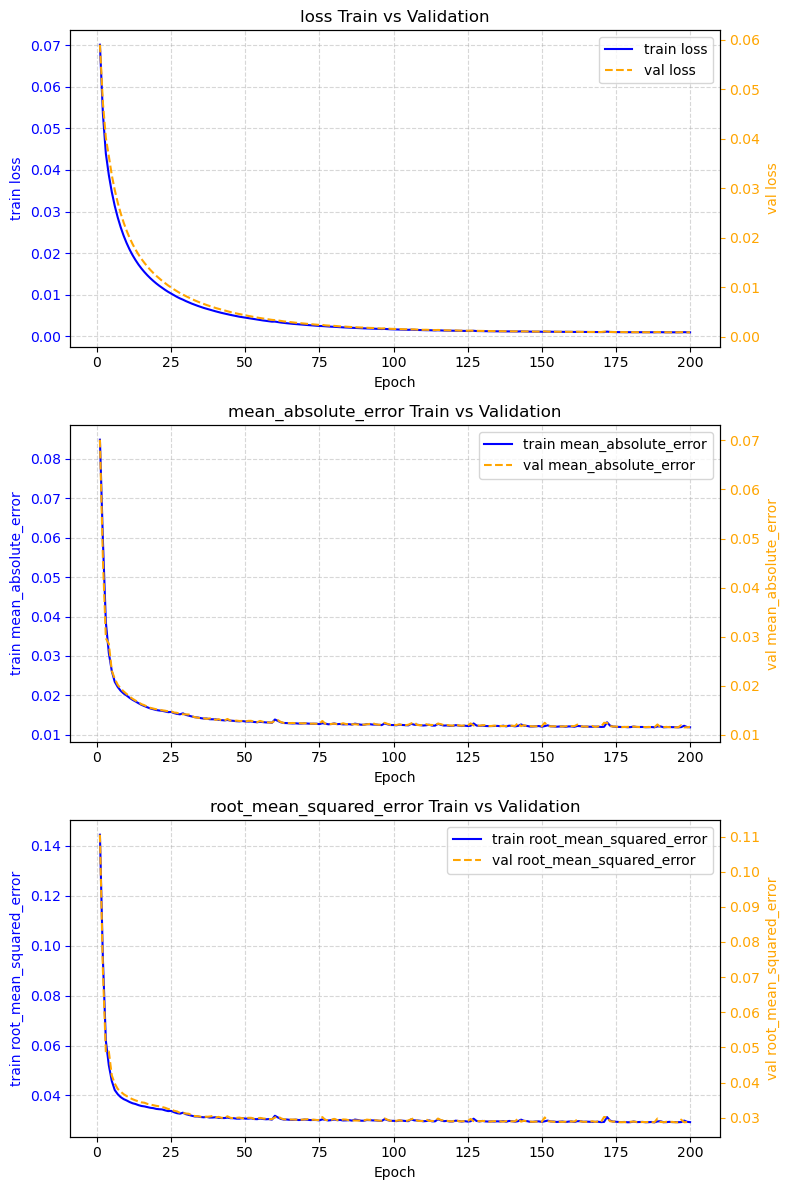

In [9]:
history_plot = history_nor
metrics = [m for m in history_plot.history if not m.startswith("val_")]  
n = len(metrics)  

fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), squeeze=False)  
for i, metric in enumerate(metrics):  
    val_metric = f"val_{metric}"  
    if val_metric not in history_plot.history:  
        continue  

    epochs = range(1, len(history_plot.history[metric]) + 1)  
    ax1 = axes[i, 0]  
    ax2 = ax1.twinx()  

    # train  
    ax1.plot(epochs, history_plot.history[metric],  
             color='blue',  label=f"train {metric}")  
    ax1.set_ylabel(f"train {metric}", color='blue')  
    ax1.tick_params(axis='y', colors='blue')  

    # val  
    ax2.plot(epochs, history_plot.history[val_metric],  
             color='orange',  label=f"val {metric}",linestyle="--")  
    ax2.set_ylabel(f"val {metric}", color='orange')  
    ax2.tick_params(axis='y', colors='orange')  

     
    ax1.set_xlabel("Epoch")  
    ax1.grid(True, linestyle="--", alpha=0.5)  
    lines = ax1.get_lines() + ax2.get_lines()  
    labels = [l.get_label() for l in lines]  
    ax1.legend(lines, labels, loc="best")  
    ax1.set_title(f"{metric} Train vs Validation")  

plt.tight_layout()  
plt.show()
#plt.savefig('training_history.png')

2025-11-13 18:03:50.493410: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


CPU time for 15 predictions = 2.041240768507123 s.


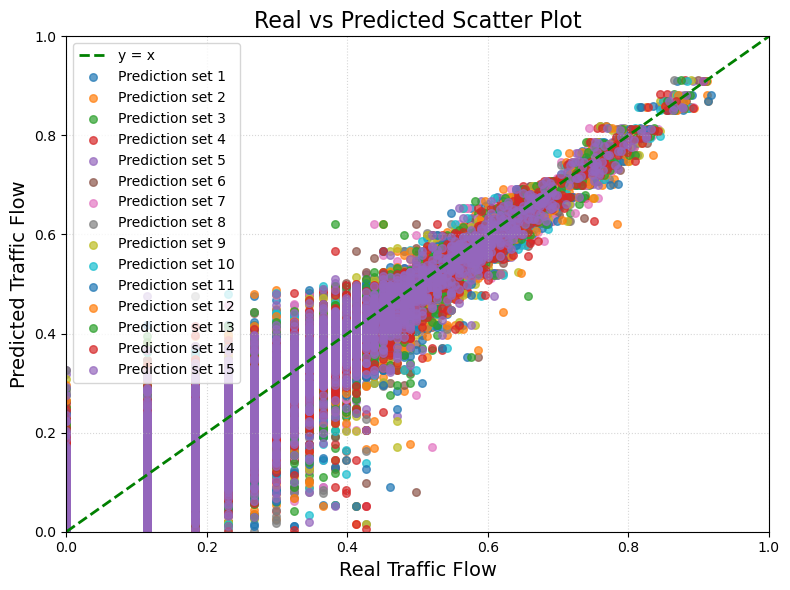

In [10]:
N_sample_policies = 15
predict_graphs_nor = []
actual_labels_nor = []
val_ds_nor = ds_nor.take(N_sample_policies) #ds_val_nor.take(10)
cpu_time = 0
# Generate prediction
for graph, labels in val_ds_nor:
    t1 = time.perf_counter()
    predict_graph = model_nor(graph)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_nor.append(predict_graph.numpy())  # Save prediction results
    actual_labels_nor.append([labels.numpy()])  # Save actual labels
print(f'CPU time for {N_sample_policies} predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_nor = np.concatenate(predict_graphs_nor, axis=0)
actual_labels_nor = np.concatenate(actual_labels_nor, axis=0)

plot_real_vs_pred_subsample(y_pred=predict_graphs_nor,y_real=actual_labels_nor,n_samples=800)


In [11]:
predict_graphs_nor = []
actual_labels_nor = []
val_ds_nor = ds_val_nor
cpu_time = 0
# Generate prediction
for graph, labels in val_ds_nor:
    t1 = time.perf_counter()
    predict_graph = model_nor(graph)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_nor.append(predict_graph.numpy())  # Save prediction results
    actual_labels_nor.append([labels.numpy()])  # Save actual labels
print(f'CPU time for {len(data_val)} predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_nor = np.concatenate(predict_graphs_nor, axis=0)
actual_labels_nor = np.concatenate(actual_labels_nor, axis=0)

CPU time for 60 predictions = 8.03196079051122 s.


MAPE = 21.313%
SMAPE = 167.564%
Median APE = 11.294%
WAPE = 20.742%


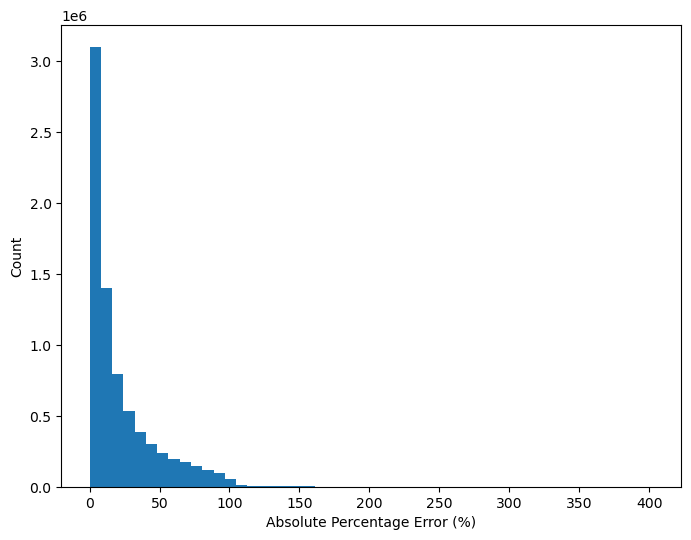

In [12]:
y_true = np.asarray(actual_labels_nor).ravel()  
y_pred = np.asarray(predict_graphs_nor).ravel()
eps = 1e-8
mask = y_true != 0  
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
print(f"MAPE = {mape:.3f}%")  
smape = 2 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6)) * 100  
print(f"SMAPE = {smape:.3f}%")
ape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100    
median_ape = np.median(ape)  
print(f"Median APE = {median_ape:.3f}%")
wape = np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(y_true)) * 100  
print(f"WAPE = {wape:.3f}%")

fig = plt.figure(figsize=(8, 6))    
plt.hist(ape, bins=50)  
plt.xlabel("Absolute Percentage Error (%)")  
plt.ylabel("Count")  
plt.show()

In [13]:
num = np.linalg.norm(y_true - y_pred, ord=2)  
den = np.linalg.norm(y_true,        ord=2)  
accuracy_l2 = 1 - num/(den + eps )     
print(f"Relative Accuracy (L2) = {accuracy_l2:.4f}  ({accuracy_l2*100:.2f}%)")  
from sklearn.metrics import explained_variance_score, r2_score
ev = explained_variance_score(y_true, y_pred)  
print(f"Explained Variance (sklearn) = {ev:.4f}  ({ev*100:.2f}%)")
r2 = r2_score(y_true, y_pred)  
print(f"R² on test set: {r2:.4f} ({r2*100:.2f}%)")  

Relative Accuracy (L2) = 0.8072  (80.72%)
Explained Variance (sklearn) = 0.9567  (95.67%)
R² on test set: 0.9567 (95.67%)


In [14]:
def l2_error_ts(pt,tl):
    return np.linalg.norm(pt-tl, ord=2, axis=0) 
def autocorr(x):  
    x = np.asarray(x)  
    x = x - x.mean()  
    corr = np.correlate(x, x, mode='full')  
    mid  = len(corr)//2  
    acf  = corr[mid:] / corr[mid]             
    return acf  
def compute_acf(x, nlags=None):  
  
    x = np.asarray(x)  
    N = x.size  
    if nlags is None:  
        nlags = N - 1   
    x = x - x.mean()  
    corr = np.correlate(x, x, mode='full')       
    mid = len(corr) // 2  
    acf_full = corr[mid: mid + nlags + 1]  
    
    acf_full = acf_full / acf_full[0]  
    return acf_full 

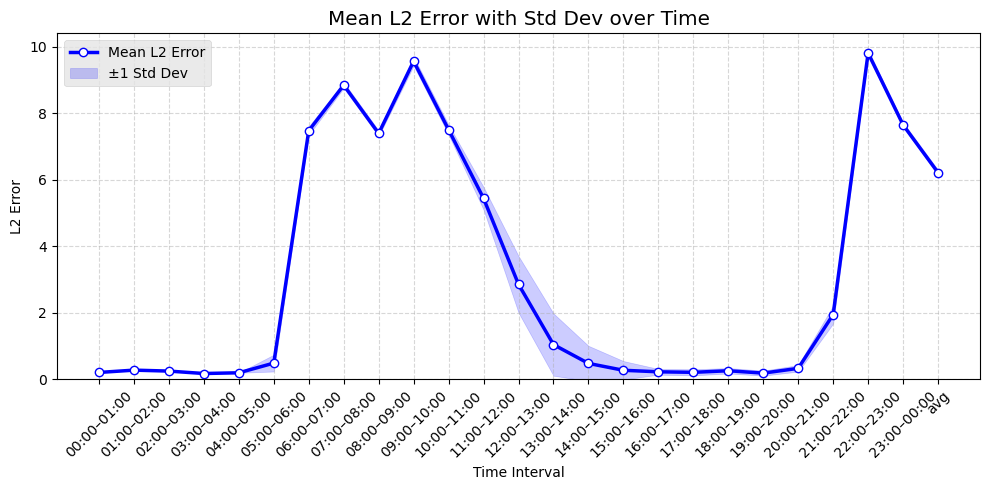

In [15]:
errors_nor = list()
for i in range(len(actual_labels_nor)):
    pt = predict_graphs_nor[i]
    tl = actual_labels_nor[i]
    errors_nor.append(l2_error_ts(pt,tl))
errors_nor = np.array(errors_nor)
mean_err = errors_nor.mean(axis=0)  
std_err  = errors_nor.std(axis=0)  


start_hour = 0  
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(24)] + ["avg"]  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(25), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(25),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(25))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors.png')

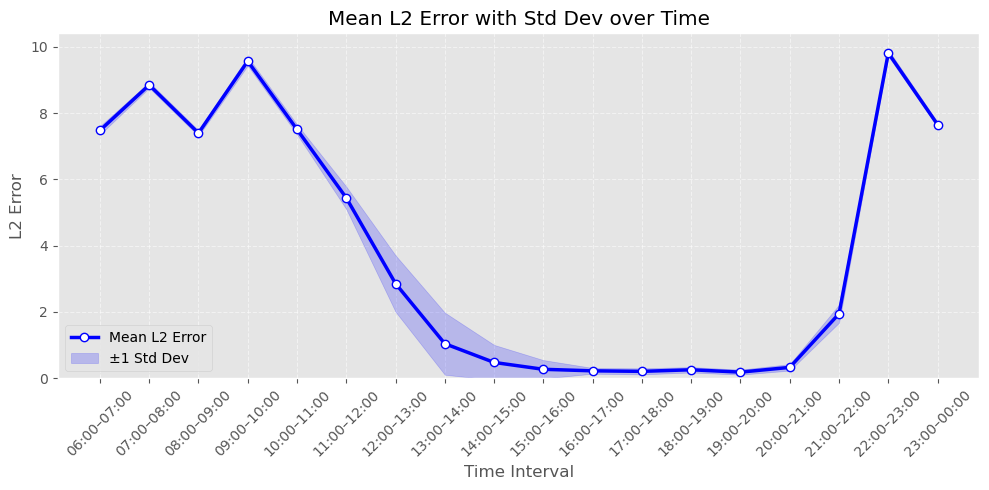

In [16]:
start_hour = 6 
t_range = 18
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(t_range)] 

errors_nor = list()
for i in range(len(actual_labels_nor)):
    pt = predict_graphs_nor[i][:,start_hour:start_hour+t_range]
    tl = actual_labels_nor[i][:,start_hour:start_hour+t_range]
    errors_nor.append(l2_error_ts(pt,tl))
errors_nor = np.array(errors_nor)

mean_err = errors_nor.mean(axis=0)  
std_err  = errors_nor.std(axis=0)  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(t_range), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(t_range),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(t_range))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.show()


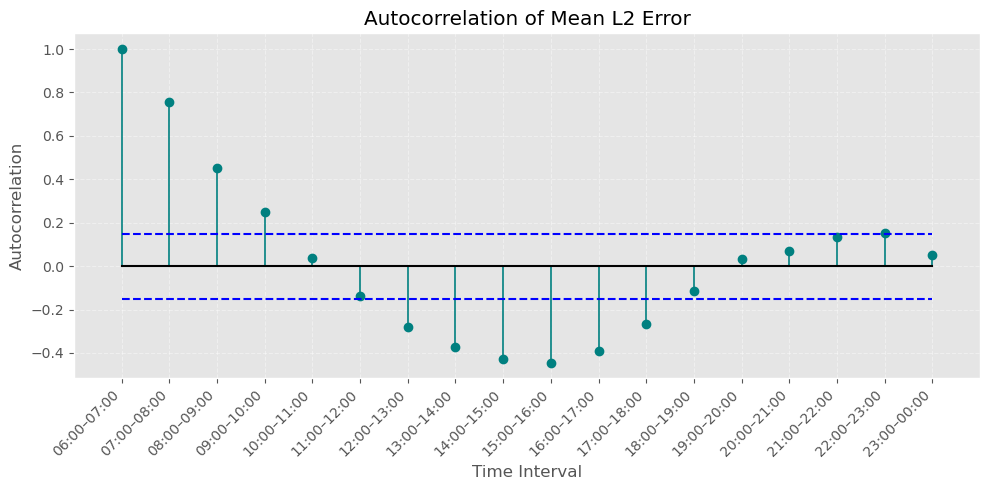

In [17]:
N = mean_err.size  
nlags = N - 1  
# ACF  
acf_vals = compute_acf(mean_err, nlags=nlags)  
lags     = np.arange(nlags + 1)  
#start_hour = 7  
time_labels = [  
    f"{(start_hour + i) % 24:02d}:00–{(start_hour + i + 1) % 24:02d}:00"  
    for i in range(N)  
]  
plt.style.use('ggplot')  
fig, ax = plt.subplots(figsize=(10, 5))  
markerline, stemlines, baseline = ax.stem(  
    lags, acf_vals,  
    linefmt='teal', markerfmt='o', basefmt='k-'  
)  
plt.setp(stemlines, 'linewidth', 1.2)  
plt.setp(markerline, 'markersize', 6)  
ax.set_xticks(lags)  
ax.set_xticklabels(time_labels, rotation=45, ha='right')  
plt.plot(lags,lags*0+0.15,color='blue',linestyle='--')
plt.plot(lags,lags*0-0.15,color='blue',linestyle='--')
ax.set_xlabel('Time Interval')  
ax.set_ylabel('Autocorrelation')  
ax.set_title('Autocorrelation of Mean L2 Error')    
ax.set_xlim(-1, nlags + 1)  
#ax.set_ylim(-1.1, 1.1)  
ax.grid(True, linestyle='--', alpha=0.4)  
plt.tight_layout()  
plt.show()

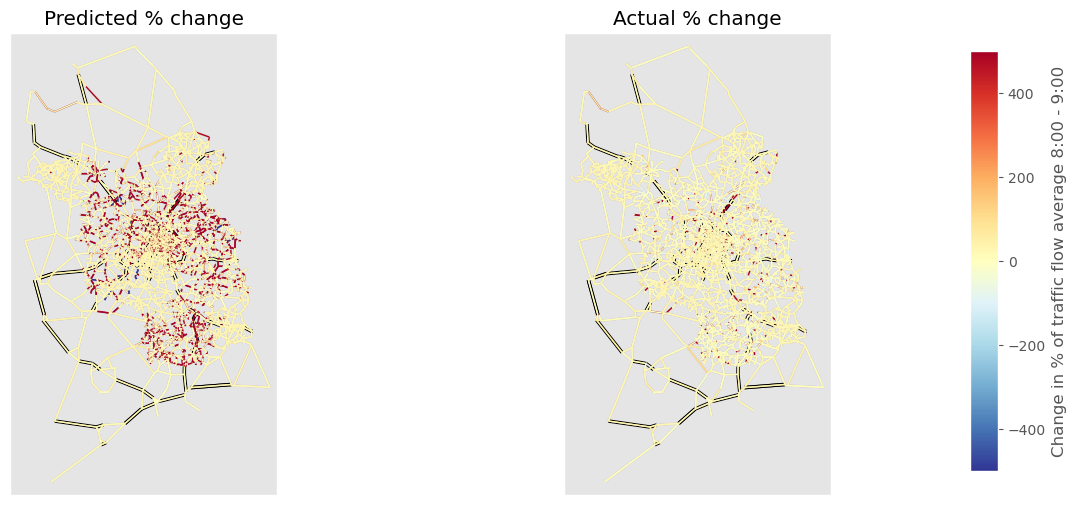

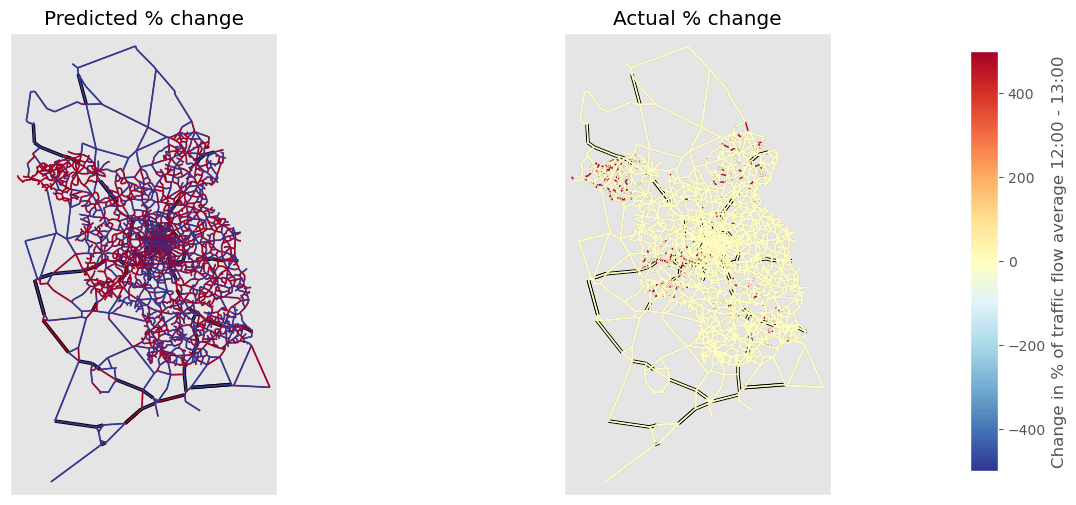

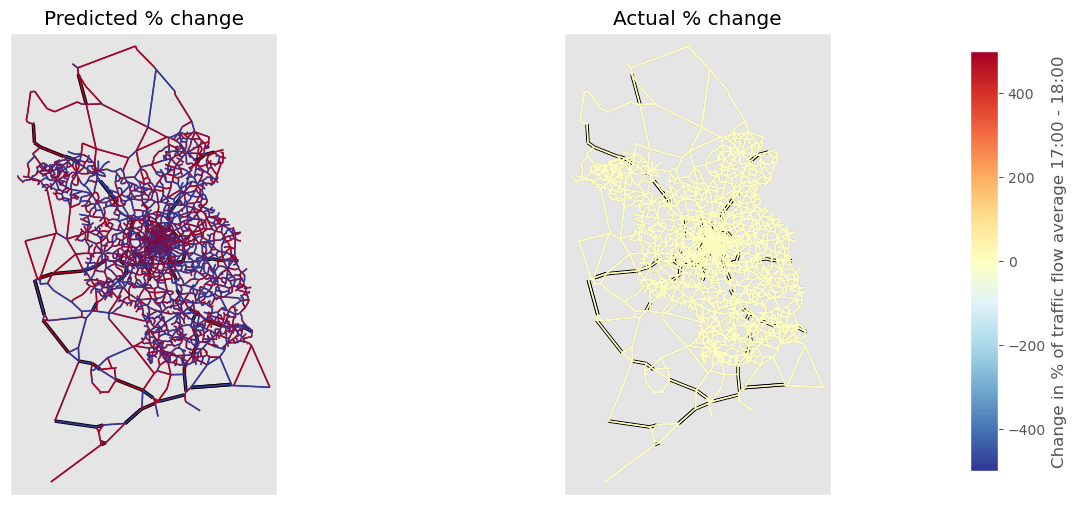

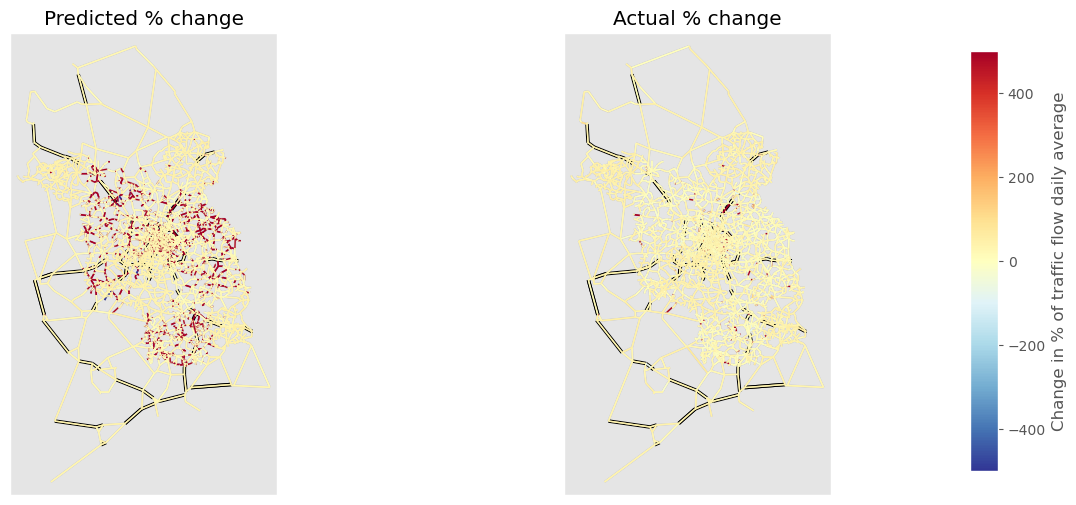

In [19]:
#network error reverse of logp1 (expm1)
index_t = [8,12,17,-1]
gt = next(iter(val_ds_nor))[0]
for ti in index_t:
    c_title = f" average {ti}:00 - {ti+1}:00"
    if ti==-1 or ti==25:
        c_title = " daily average"
    #print(f"ti = {ti}")
    hsr_np = gt.node_sets['links']['base_hrs_avg'].numpy()[:,ti]
    hrs_pt = predict_graphs_nor[0][:,ti]
    hrs_lb = actual_labels_nor[0][:,ti]
    
    plot_policy_network_2panels(  
        net_xml_path="network.xml",  
        policy_links_txt="policy_roads_id_241.txt",  
        hrs_no_policy=hsr_np,   
        hrs_pred=np.expm1(hrs_pt),  
        hrs_real=np.expm1(hrs_lb),
        c_title=c_title
    )  

In [20]:
#RNN

data_rnn = prepare_rnn_data(data_s)
data_val_rnn = prepare_rnn_data(data_val_s)


ds_rnn = build_dataset_rnn(data_rnn)
ds_val_rnn = build_dataset_rnn(data_val_rnn)

# --------- Training set ----------
train_ds_batched_rnn = (
    ds_rnn
    .shuffle(buffer_size=3, seed=SEED)
    .batch(batch_size)          
    .repeat()                   
    .prefetch(tf.data.AUTOTUNE)
)

# --------- Validation set ----------
val_ds_batched_rnn = (
    ds_val_rnn
    .batch(batch_size)          
    .prefetch(tf.data.AUTOTUNE)
)
input_spec, label_spec = train_ds_batched_rnn.element_spec

In [21]:
#LSTM model
model_lstm = build_regression_model_lstm( input_tensor_spec = input_spec,output_tensor_spec =label_spec,hidden_dim = 8)
# Compile model
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError()
    ]
)
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 27664, 25, 9)]    0         
                                                                 
 lambda_1 (Lambda)           (None, 25, 9)             0         
                                                                 
 lstm (LSTM)                 (None, 25, 8)             576       
                                                                 
 lambda_2 (Lambda)           (None, 27664, 25, 8)      0         
                                                                 
 time_distributed_1 (TimeDi  (None, 27664, 25, 1)      9         
 stributed)                                                      
                                                                 
Total params: 585 (2.29 KB)
Trainable params: 585 (2.29 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________

In [22]:
tprint('LSTM Model Training')
# Train model
history_lstm = model_lstm.fit(train_ds_batched_rnn, steps_per_epoch=10,epochs=200,validation_data=val_ds_batched_rnn)

tprint('LSTM Model training completed')

[2025-11-13 18:13:49.697] LSTM Model Training
Epoch 1/200
10/10 [==============================] - 6s 466ms/step - loss: 0.4454 - mean_absolute_error: 0.5414 - root_mean_squared_error: 0.6674 - val_loss: 0.3614 - val_mean_absolute_error: 0.4823 - val_root_mean_squared_error: 0.6012
Epoch 2/200


2025-11-13 18:13:55.634815: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 [==============================] - 4s 398ms/step - loss: 0.3070 - mean_absolute_error: 0.4412 - root_mean_squared_error: 0.5540 - val_loss: 0.2473 - val_mean_absolute_error: 0.3941 - val_root_mean_squared_error: 0.4973
Epoch 3/200
10/10 [==============================] - 4s 390ms/step - loss: 0.2100 - mean_absolute_error: 0.3615 - root_mean_squared_error: 0.4582 - val_loss: 0.1697 - val_mean_absolute_error: 0.3238 - val_root_mean_squared_error: 0.4119
Epoch 4/200
10/10 [==============================] - 4s 387ms/step - loss: 0.1451 - mean_absolute_error: 0.2978 - root_mean_squared_error: 0.3809 - val_loss: 0.1185 - val_mean_absolute_error: 0.2677 - val_root_mean_squared_error: 0.3443
Epoch 5/200
10/10 [==============================] - 4s 390ms/step - loss: 0.1025 - mean_absolute_error: 0.2474 - root_mean_squared_error: 0.3202 - val_loss: 0.0851 - val_mean_absolute_error: 0.2242 - val_root_mean_squared_error: 0.2917
Epoch 6/200
10/10 [==============================] - 4s 393ms/st

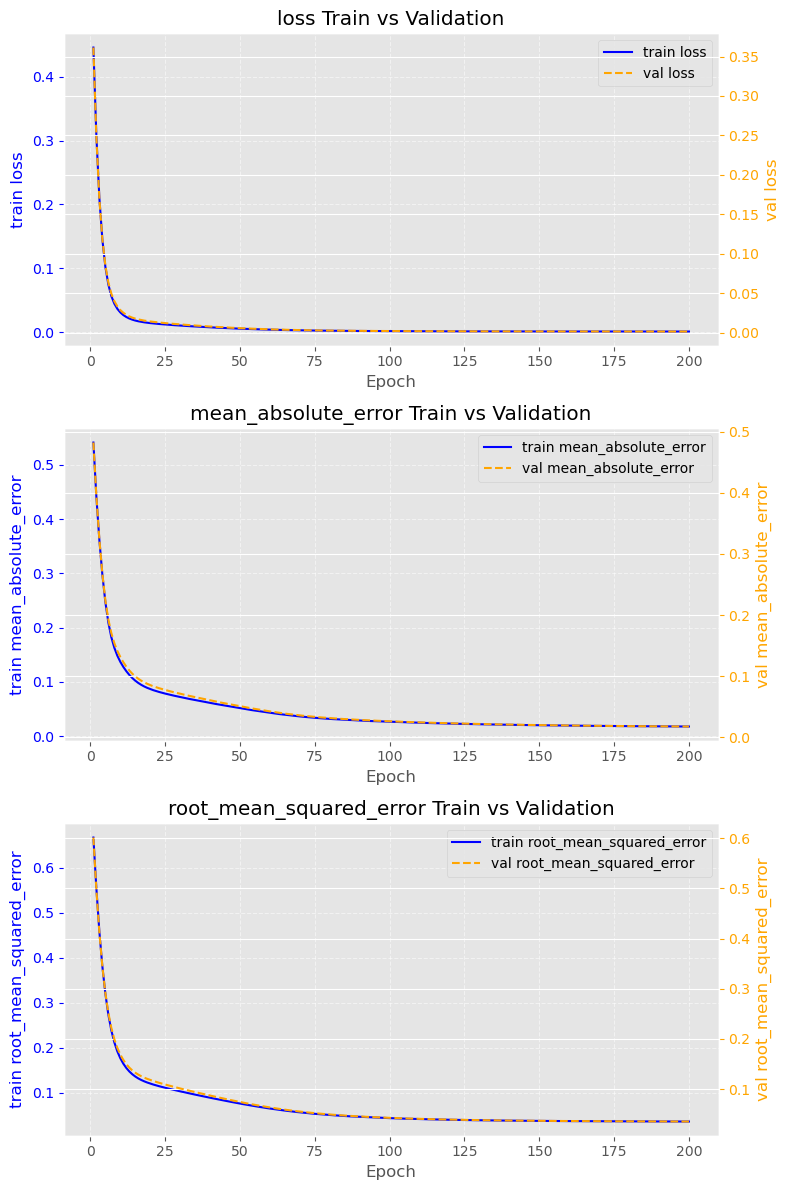

In [23]:
#plot
history_plot = history_lstm 
metrics = [m for m in history_plot.history if not m.startswith("val_")]  
n = len(metrics)  

fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), squeeze=False)  
for i, metric in enumerate(metrics):  
    val_metric = f"val_{metric}"  
    if val_metric not in history_plot.history:  
        continue  

    epochs = range(1, len(history_plot.history[metric]) + 1)  
    ax1 = axes[i, 0]  
    ax2 = ax1.twinx()  

    # train  
    ax1.plot(epochs, history_plot.history[metric],  
             color='blue',  label=f"train {metric}")  
    ax1.set_ylabel(f"train {metric}", color='blue')  
    ax1.tick_params(axis='y', colors='blue')  

    # val  
    ax2.plot(epochs, history_plot.history[val_metric],  
             color='orange',  label=f"val {metric}",linestyle="--")  
    ax2.set_ylabel(f"val {metric}", color='orange')  
    ax2.tick_params(axis='y', colors='orange')  

     
    ax1.set_xlabel("Epoch")  
    ax1.grid(True, linestyle="--", alpha=0.5)  
    lines = ax1.get_lines() + ax2.get_lines()  
    labels = [l.get_label() for l in lines]  
    ax1.legend(lines, labels, loc="best")  
    ax1.set_title(f"{metric} Train vs Validation")  

plt.tight_layout()  
plt.show()

CPU time for 10 predictions = 1.794556946028024 s.
(10, 27664, 25, 1)
(10, 27664, 25, 1)


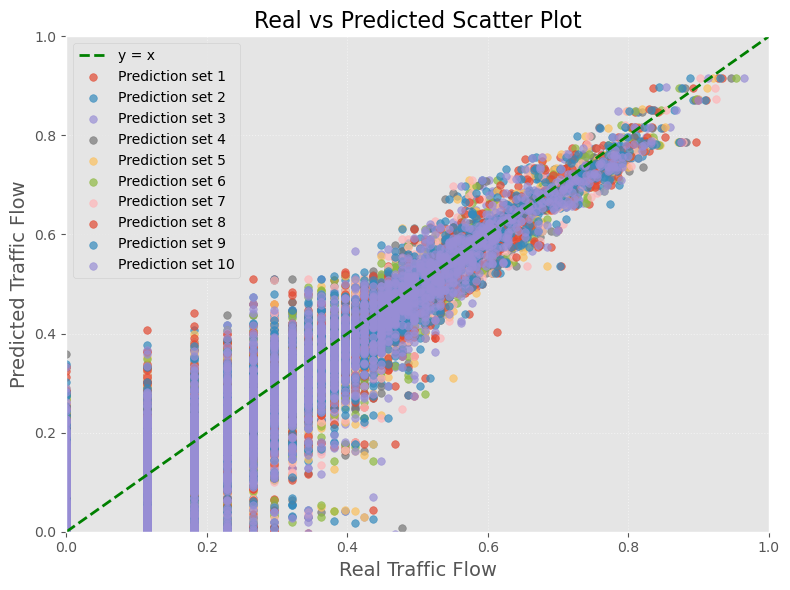

In [24]:
predict_graphs_lstm = []
actual_labels_lstm = []
val_ds_rnn = ds_val_rnn.take(10).batch(1).prefetch(tf.data.AUTOTUNE)
cpu_time = 0
# Generate prediction
for graph, labels in val_ds_rnn:
    t1 = time.perf_counter()
    predict_graph = model_lstm(graph)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_lstm.append(predict_graph.numpy())  # Save prediction results
    actual_labels_lstm.append(labels.numpy())  # Save actual labels
print(f'CPU time for 10 predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_lstm = np.concatenate(predict_graphs_lstm, axis=0)
actual_labels_lstm = np.concatenate(actual_labels_lstm, axis=0)
print(predict_graphs_lstm.shape)
print(actual_labels_lstm.shape)

plot_real_vs_pred_subsample(y_pred=predict_graphs_lstm,y_real=actual_labels_lstm,n_samples=800)


In [26]:
predict_graphs_lstm = []
actual_labels_lstm = []
val_ds_lstm = (
    ds_val_rnn       # (23, 25, 9)
    .batch(1)         # -> (1, 23, 25, 9)
    .prefetch(tf.data.AUTOTUNE)
)
cpu_time = 0
# Generate prediction
for inputs, labels in val_ds_lstm:
    t1 = time.perf_counter()
    predict_graph = model_lstm(inputs)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_lstm.append(predict_graph.numpy())  # Save prediction results
    actual_labels_lstm.append(labels.numpy())  # Save actual labels
print(f'CPU time for {len(data_val)} predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_lstm = np.concatenate(predict_graphs_lstm, axis=0)
actual_labels_lstm = np.concatenate(actual_labels_lstm, axis=0)

predict_graphs_lstm = np.squeeze(predict_graphs_lstm,axis=-1)
actual_labels_lstm = np.squeeze(actual_labels_lstm,axis=-1)


CPU time for 60 predictions = 9.79081653803587 s.


MAPE = 25.372%
SMAPE = 169.538%
Median APE = 12.331%
WAPE = 31.176%


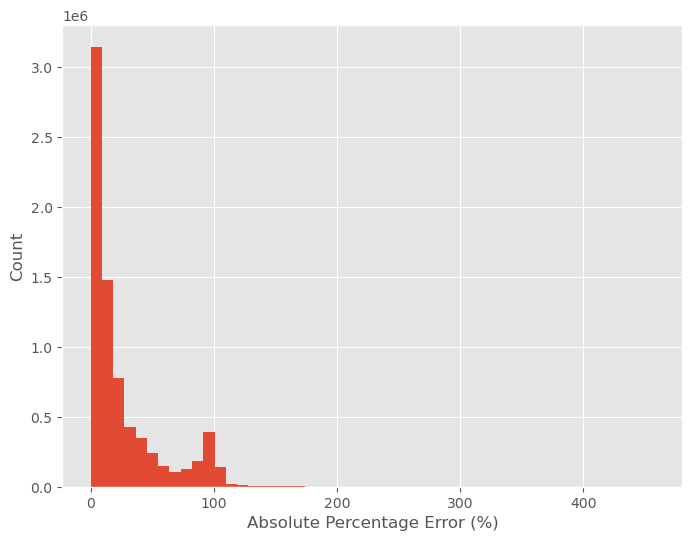

In [27]:
#error
y_true = np.asarray(actual_labels_lstm).ravel()  
y_pred = np.asarray(predict_graphs_lstm).ravel()
eps = 1e-8
mask = y_true != 0  
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
print(f"MAPE = {mape:.3f}%")  
smape = 2 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6)) * 100  
print(f"SMAPE = {smape:.3f}%")
ape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100    
median_ape = np.median(ape)  
print(f"Median APE = {median_ape:.3f}%")
wape = np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(y_true)) * 100  
print(f"WAPE = {wape:.3f}%")

fig = plt.figure(figsize=(8, 6))    
plt.hist(ape, bins=50)  
plt.xlabel("Absolute Percentage Error (%)")  
plt.ylabel("Count")  
plt.savefig('APE_lstm.png')

In [28]:
num = np.linalg.norm(y_true - y_pred, ord=2)  
den = np.linalg.norm(y_true,        ord=2)  
accuracy_l2 = 1 - num/(den + eps )     
print(f"Relative Accuracy (L2) = {accuracy_l2:.4f}  ({accuracy_l2*100:.2f}%)")  
ev = explained_variance_score(y_true, y_pred)  
print(f"Explained Variance (sklearn) = {ev:.4f}  ({ev*100:.2f}%)")
r2 = r2_score(y_true, y_pred)  
print(f"R² on test set: {r2:.4f} ({r2*100:.2f}%)")  


Relative Accuracy (L2) = 0.7629  (76.29%)
Explained Variance (sklearn) = 0.9346  (93.46%)
R² on test set: 0.9346 (93.46%)


In [29]:
errors_lstm = list()
for i in range(len(actual_labels_lstm)):
    pt = predict_graphs_lstm[i]
    tl = actual_labels_lstm[i]
    errors_lstm.append(l2_error_ts(pt,tl))
errors_lstm = np.array(errors_lstm)
mean_err = errors_lstm.mean(axis=0)  
std_err  = errors_lstm.std(axis=0)  


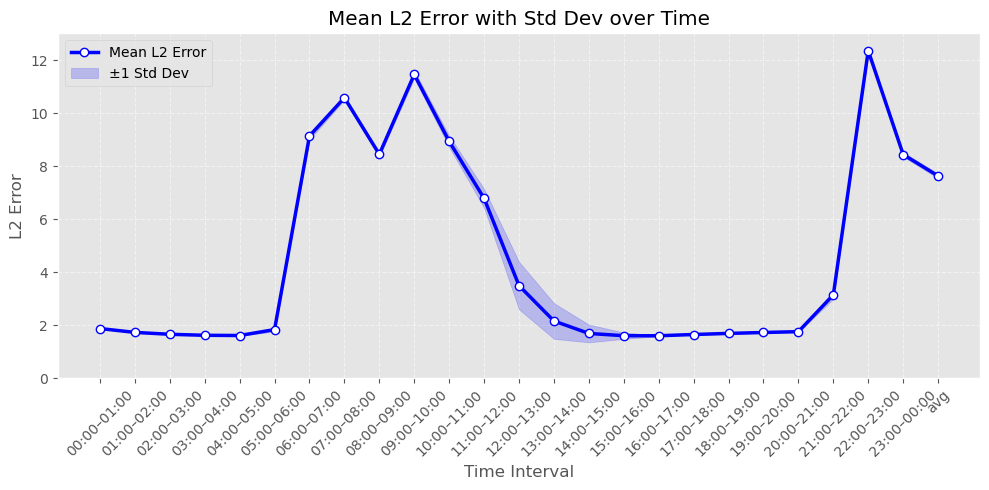

In [30]:
start_hour = 0  
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(24)] + ["avg"]  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(25), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(25),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(25))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_lstm.png')


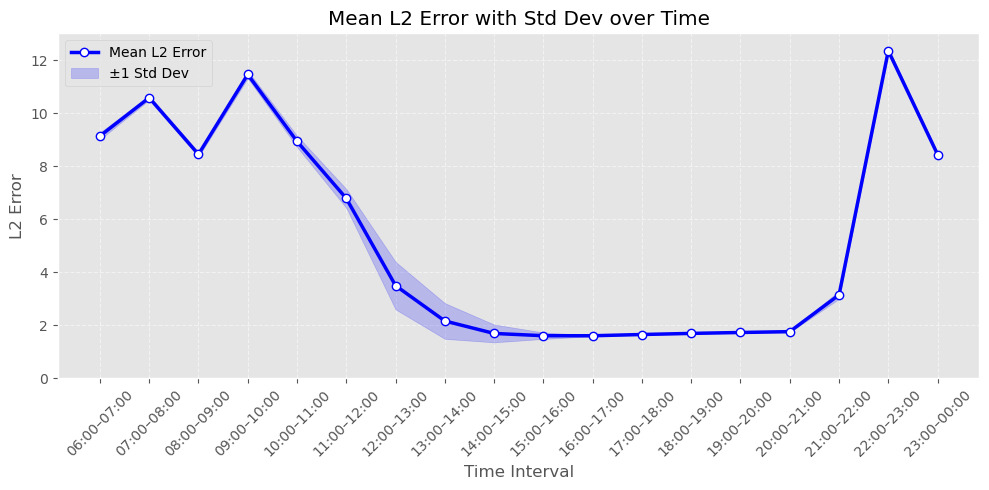

In [31]:
start_hour = 6 
t_range = 18
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(t_range)] 

errors_lstm = list()
for i in range(len(actual_labels_lstm)):
    pt = predict_graphs_lstm[i][:,start_hour:start_hour+t_range]
    tl = actual_labels_lstm[i][:,start_hour:start_hour+t_range]
    errors_lstm.append(l2_error_ts(pt,tl))
errors_lstm = np.array(errors_lstm)

mean_err = errors_lstm.mean(axis=0)  
std_err  = errors_lstm.std(axis=0)  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(t_range), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(t_range),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(t_range))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_4_20_lstm.png')


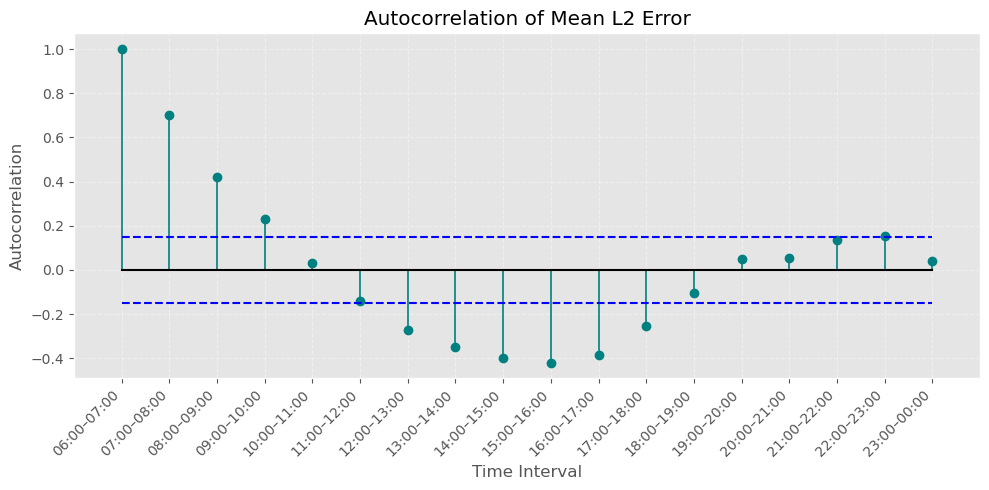

In [32]:
N = mean_err.size  
nlags = N - 1  
# ACF  
acf_vals = compute_acf(mean_err, nlags=nlags)  
lags     = np.arange(nlags + 1)  
#start_hour = 7  
time_labels = [  
    f"{(start_hour + i) % 24:02d}:00–{(start_hour + i + 1) % 24:02d}:00"  
    for i in range(N)  
]  
plt.style.use('ggplot')  
fig, ax = plt.subplots(figsize=(10, 5))  
markerline, stemlines, baseline = ax.stem(  
    lags, acf_vals,  
    linefmt='teal', markerfmt='o', basefmt='k-'  
)  
plt.setp(stemlines, 'linewidth', 1.2)  
plt.setp(markerline, 'markersize', 6)  
ax.set_xticks(lags)  
ax.set_xticklabels(time_labels, rotation=45, ha='right')  
plt.plot(lags,lags*0+0.15,color='blue',linestyle='--')
plt.plot(lags,lags*0-0.15,color='blue',linestyle='--')
ax.set_xlabel('Time Interval')  
ax.set_ylabel('Autocorrelation')  
ax.set_title('Autocorrelation of Mean L2 Error')    
ax.set_xlim(-1, nlags + 1)  
#ax.set_ylim(-1.1, 1.1)  
ax.grid(True, linestyle='--', alpha=0.4)  
plt.tight_layout()  
plt.savefig('acf_lstm.png') 

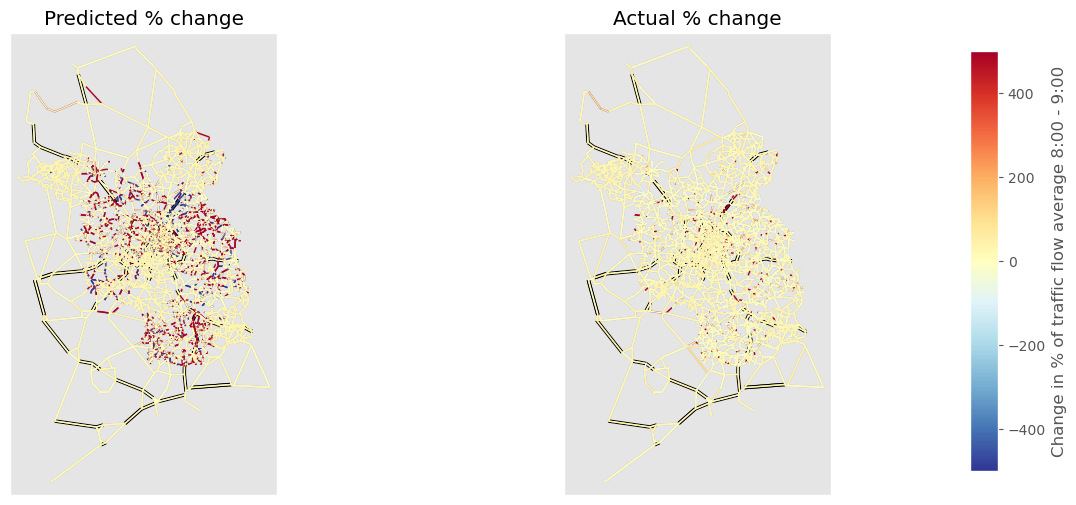

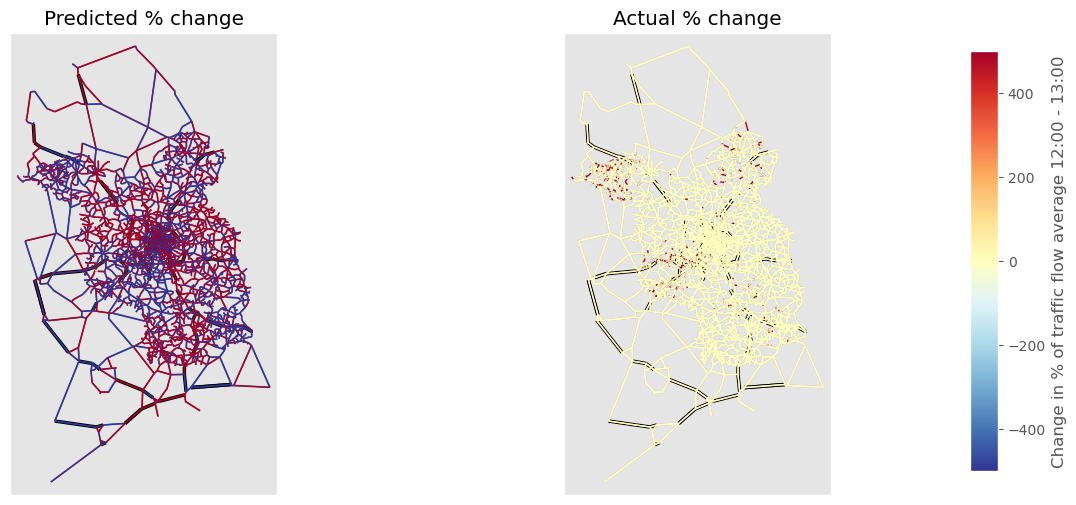

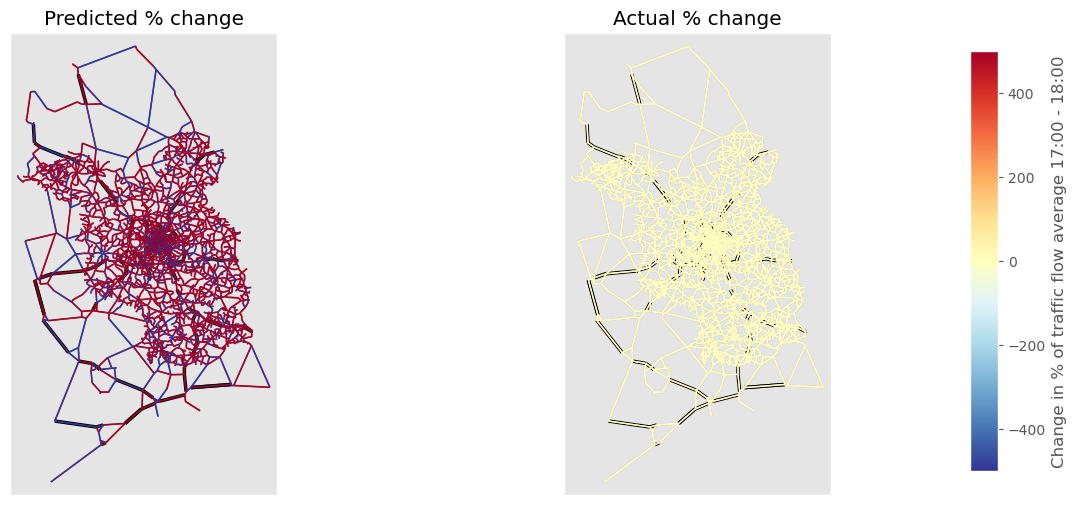

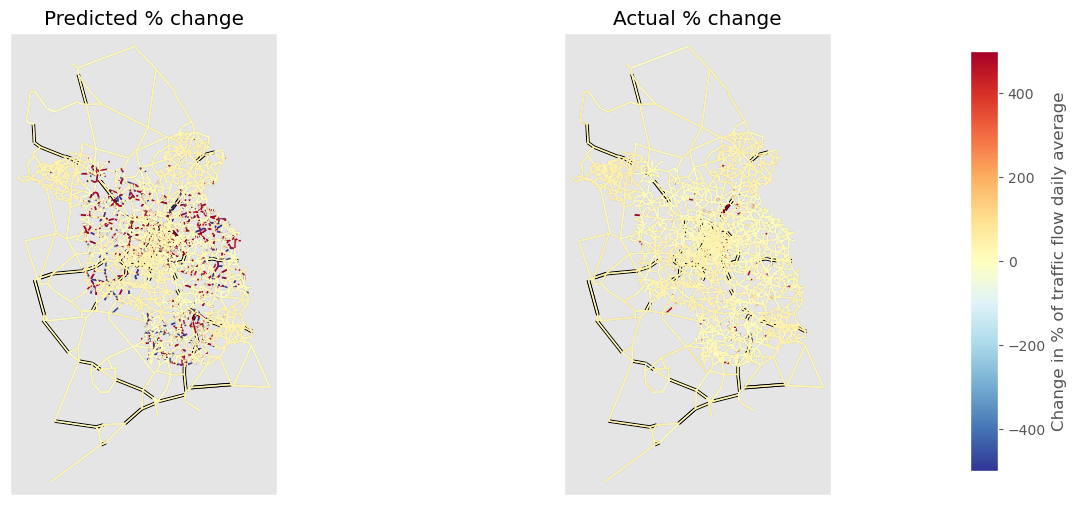

In [33]:
#network error reverse of logp1 (expm1)
index_t = [8,12,17,-1]
#gt = next(iter(val_ds_lstm))[0]
for ti in index_t:
    c_title = f" average {ti}:00 - {ti+1}:00"
    if ti==-1 or ti==25:
        c_title = " daily average"
    #print(f"ti = {ti}")
    hsr_np = gt.node_sets['links']['base_hrs_avg'].numpy()[:,ti]
    hrs_pt = predict_graphs_lstm[0][:,ti]
    hrs_lb = actual_labels_lstm[0][:,ti]
    
    plot_policy_network_2panels(  
        net_xml_path="network.xml",  
        policy_links_txt="policy_roads_id_241.txt", 
        hrs_no_policy=hsr_np,   
        hrs_pred=np.expm1(hrs_pt),  
        hrs_real=np.expm1(hrs_lb),
        c_title=c_title
    )  


In [34]:
#GRU
 # Function to build a regression model
def build_regression_model_gru(input_tensor_spec,
                                output_tensor_spec,
                                hidden_dim=64):

    # ------------- Input -------------
    # input_spec.shape = (None, num_node, T, feat)
    inp = tf.keras.layers.Input(type_spec=input_tensor_spec)
    num_node = inp.shape[1]           
    T        = inp.shape[2]           
    feat_in  = inp.shape[3]

    # ---------- Merge node into batch ----------
    x = tf.keras.layers.Lambda(
            lambda z: tf.reshape(z, (-1, T, feat_in)),
            output_shape=(T, feat_in)               
        )(inp)                                       # (batch*num_node, T, feat)

    # ----------------- GRU -----------------
    x = tf.keras.layers.GRU(hidden_dim,
                             return_sequences=True)(x)  # (batch*num_node, T, hidden)

    # ------ Restore the node dimension again. ------
    def split_nodes(z):
        b = tf.shape(z)[0] // num_node                # Dynamic batch
        return tf.reshape(z, (b, num_node, T, hidden_dim))

    x = tf.keras.layers.Lambda(
            split_nodes,
            output_shape=(num_node, T, hidden_dim)    
        )(x)                                          # (batch, num_node, T, hidden)

    # ------------- Head -------------
    target_dim = output_tensor_spec.shape[-1]
    out = tf.keras.layers.TimeDistributed(            # node dim
            tf.keras.layers.TimeDistributed(          # time dim
                tf.keras.layers.Dense(target_dim))
          )(x)                                        # (batch, num_node, T, target_dim)

    model = tf.keras.Model(inp, out)
    return model

In [36]:
#GRU model
model_gru = build_regression_model_gru( input_tensor_spec = input_spec,output_tensor_spec =label_spec,hidden_dim = 8)
# Compile model
model_gru.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError()
    ]
)
model_gru.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 27664, 25, 9)]    0         
                                                                 
 lambda_5 (Lambda)           (None, 25, 9)             0         
                                                                 
 gru_1 (GRU)                 (None, 25, 8)             456       
                                                                 
 lambda_6 (Lambda)           (None, 27664, 25, 8)      0         
                                                                 
 time_distributed_5 (TimeDi  (None, 27664, 25, 1)      9         
 stributed)                                                      
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________

In [37]:
# Train model
history_gru = model_gru.fit(train_ds_batched_rnn, steps_per_epoch=10,epochs=200,validation_data=val_ds_batched_rnn)


Epoch 1/200
10/10 [==============================] - 6s 467ms/step - loss: 0.1083 - mean_absolute_error: 0.2676 - root_mean_squared_error: 0.3291 - val_loss: 0.0856 - val_mean_absolute_error: 0.2360 - val_root_mean_squared_error: 0.2926
Epoch 2/200


2025-11-17 14:32:38.470587: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 [==============================] - 4s 405ms/step - loss: 0.0716 - mean_absolute_error: 0.2136 - root_mean_squared_error: 0.2676 - val_loss: 0.0561 - val_mean_absolute_error: 0.1876 - val_root_mean_squared_error: 0.2368
Epoch 3/200
10/10 [==============================] - 4s 395ms/step - loss: 0.0466 - mean_absolute_error: 0.1701 - root_mean_squared_error: 0.2158 - val_loss: 0.0362 - val_mean_absolute_error: 0.1504 - val_root_mean_squared_error: 0.1902
Epoch 4/200
10/10 [==============================] - 4s 398ms/step - loss: 0.0305 - mean_absolute_error: 0.1379 - root_mean_squared_error: 0.1747 - val_loss: 0.0245 - val_mean_absolute_error: 0.1233 - val_root_mean_squared_error: 0.1565
Epoch 5/200
10/10 [==============================] - 4s 398ms/step - loss: 0.0216 - mean_absolute_error: 0.1137 - root_mean_squared_error: 0.1470 - val_loss: 0.0185 - val_mean_absolute_error: 0.1024 - val_root_mean_squared_error: 0.1360
Epoch 6/200
10/10 [==============================] - 4s 398ms/st

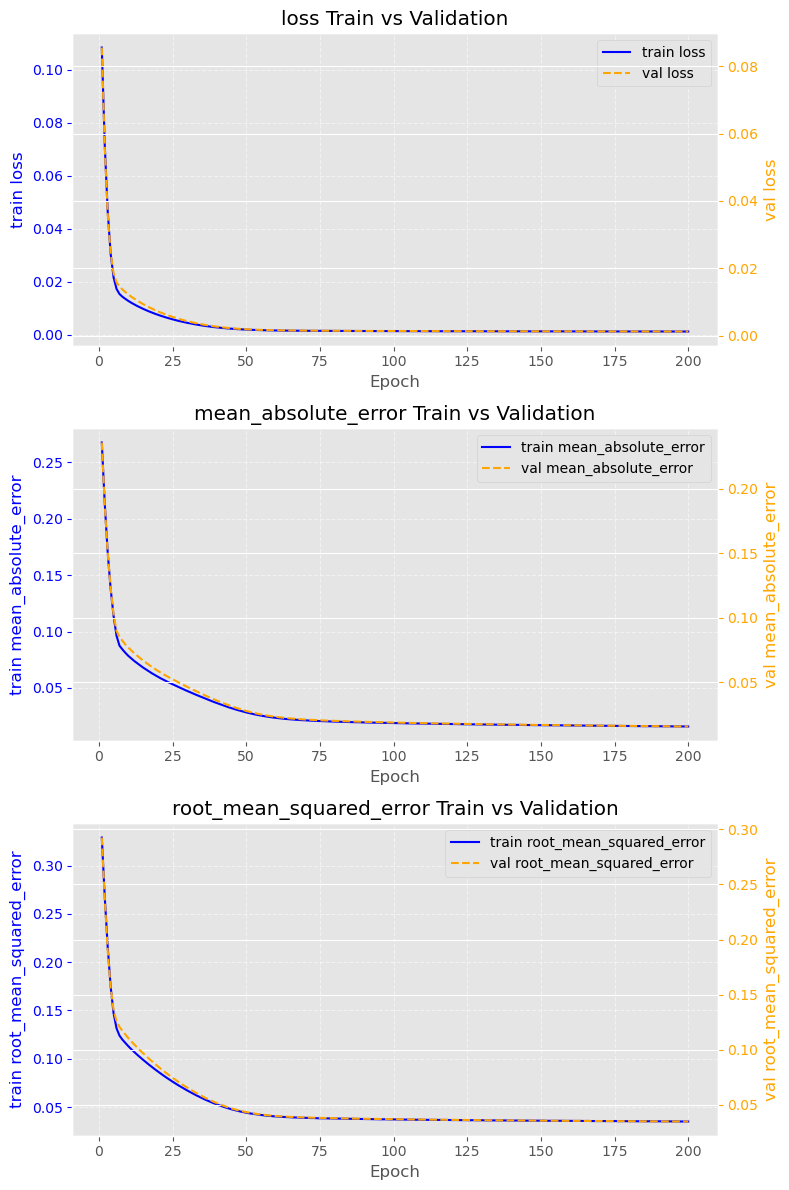

In [38]:
#plot
history_plot = history_gru 
metrics = [m for m in history_plot.history if not m.startswith("val_")]  
n = len(metrics)  

fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), squeeze=False)  
for i, metric in enumerate(metrics):  
    val_metric = f"val_{metric}"  
    if val_metric not in history_plot.history:  
        continue  

    epochs = range(1, len(history_plot.history[metric]) + 1)  
    ax1 = axes[i, 0]  
    ax2 = ax1.twinx()  

    # train  
    ax1.plot(epochs, history_plot.history[metric],  
             color='blue',  label=f"train {metric}")  
    ax1.set_ylabel(f"train {metric}", color='blue')  
    ax1.tick_params(axis='y', colors='blue')  

    # val  
    ax2.plot(epochs, history_plot.history[val_metric],  
             color='orange',  label=f"val {metric}",linestyle="--")  
    ax2.set_ylabel(f"val {metric}", color='orange')  
    ax2.tick_params(axis='y', colors='orange')  

     
    ax1.set_xlabel("Epoch")  
    ax1.grid(True, linestyle="--", alpha=0.5)  
    lines = ax1.get_lines() + ax2.get_lines()  
    labels = [l.get_label() for l in lines]  
    ax1.legend(lines, labels, loc="best")  
    ax1.set_title(f"{metric} Train vs Validation")  

plt.tight_layout()  
plt.savefig('training_history_gru.png')

CPU time for 10 predictions = 2.407990991137922 s.


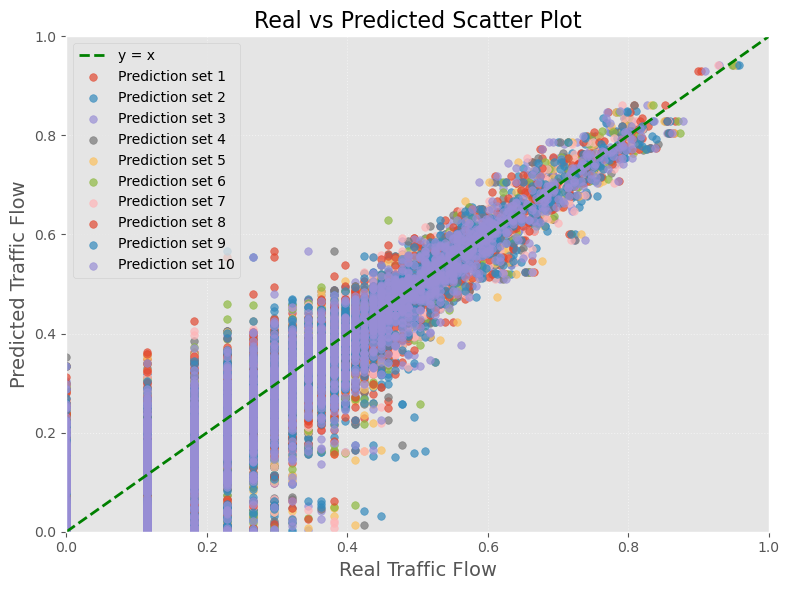

In [40]:
predict_graphs_gru = []
actual_labels_gru = []
val_ds_rnn = ds_val_rnn.take(10).batch(1).prefetch(tf.data.AUTOTUNE)
cpu_time = 0
# Generate prediction
for graph, labels in val_ds_rnn:
    t1 = time.perf_counter()
    predict_graph = model_gru(graph)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_gru.append(predict_graph.numpy())  # Save prediction results
    actual_labels_gru.append(labels.numpy())  # Save actual labels
print(f'CPU time for 10 predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_gru = np.concatenate(predict_graphs_gru, axis=0)
actual_labels_gru = np.concatenate(actual_labels_gru, axis=0)
save_plot_real_vs_pred_subsample(y_pred=predict_graphs_gru,y_real=actual_labels_gru,n_samples=800,filename='real_vs_pred_gru.png')

In [41]:
predict_graphs_gru = []
actual_labels_gru = []
val_ds_gru = (
    ds_val_rnn       # (23, 25, 9)
    .batch(1)         # -> (1, 23, 25, 9)
    .prefetch(tf.data.AUTOTUNE)
)
cpu_time = 0
# Generate prediction
for inputs, labels in val_ds_gru:
    t1 = time.perf_counter()
    predict_graph = model_gru(inputs)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_gru.append(predict_graph.numpy())  # Save prediction results
    actual_labels_gru.append(labels.numpy())  # Save actual labels
print(f'CPU time for {len(data_val)} predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_gru = np.concatenate(predict_graphs_gru, axis=0)
actual_labels_gru = np.concatenate(actual_labels_gru, axis=0)

predict_graphs_gru = np.squeeze(predict_graphs_gru,axis=-1)
actual_labels_gru = np.squeeze(actual_labels_gru,axis=-1)


CPU time for 60 predictions = 13.151896024122834 s.


MAPE = 25.342%
SMAPE = 169.542%
Median APE = 12.285%
WAPE = 27.825%


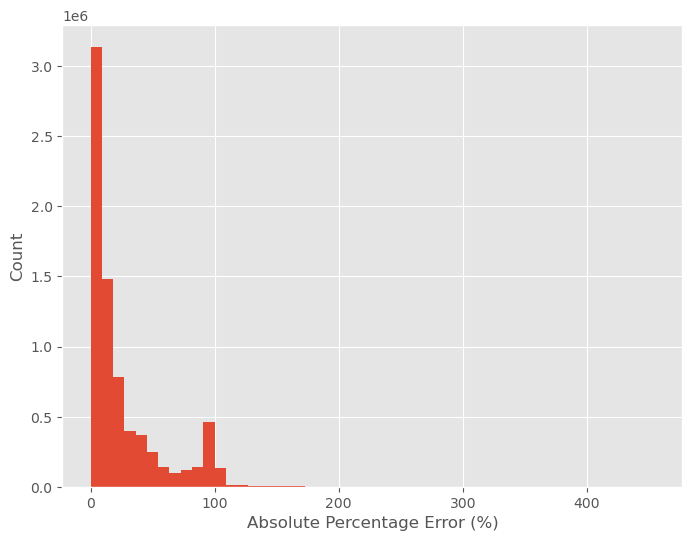

In [42]:
#error
y_true = np.asarray(actual_labels_gru).ravel()  
y_pred = np.asarray(predict_graphs_gru).ravel()
eps = 1e-8
mask = y_true != 0  
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
print(f"MAPE = {mape:.3f}%")  
smape = 2 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6)) * 100  
print(f"SMAPE = {smape:.3f}%")
ape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100    
median_ape = np.median(ape)  
print(f"Median APE = {median_ape:.3f}%")
wape = np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(y_true)) * 100  
print(f"WAPE = {wape:.3f}%")

fig = plt.figure(figsize=(8, 6))    
plt.hist(ape, bins=50)  
plt.xlabel("Absolute Percentage Error (%)")  
plt.ylabel("Count")  
plt.savefig('APE_gru.png')


In [43]:
num = np.linalg.norm(y_true - y_pred, ord=2)  
den = np.linalg.norm(y_true,        ord=2)  
accuracy_l2 = 1 - num/(den + eps )     
print(f"Relative Accuracy (L2) = {accuracy_l2:.4f}  ({accuracy_l2*100:.2f}%)")  
ev = explained_variance_score(y_true, y_pred)  
print(f"Explained Variance (sklearn) = {ev:.4f}  ({ev*100:.2f}%)")
r2 = r2_score(y_true, y_pred)  
print(f"R² on test set: {r2:.4f} ({r2*100:.2f}%)") 

Relative Accuracy (L2) = 0.7677  (76.77%)
Explained Variance (sklearn) = 0.9372  (93.72%)
R² on test set: 0.9372 (93.72%)


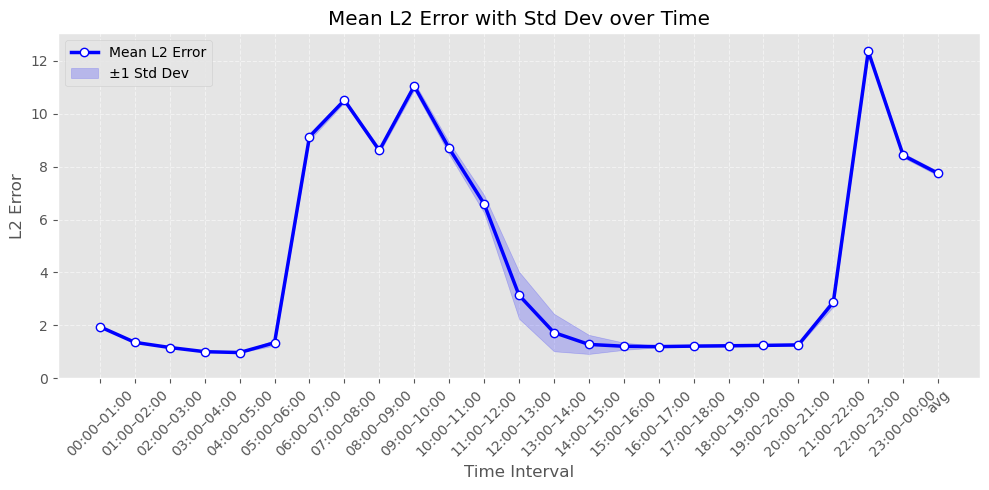

In [44]:
errors_gru = list()
for i in range(len(actual_labels_gru)):
    pt = predict_graphs_gru[i]
    tl = actual_labels_gru[i]
    errors_gru.append(l2_error_ts(pt,tl))
errors_gru = np.array(errors_gru)
mean_err = errors_gru.mean(axis=0)  
std_err  = errors_gru.std(axis=0)  

start_hour = 0  
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(24)] + ["avg"]  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(25), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(25),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(25))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_gru.png')

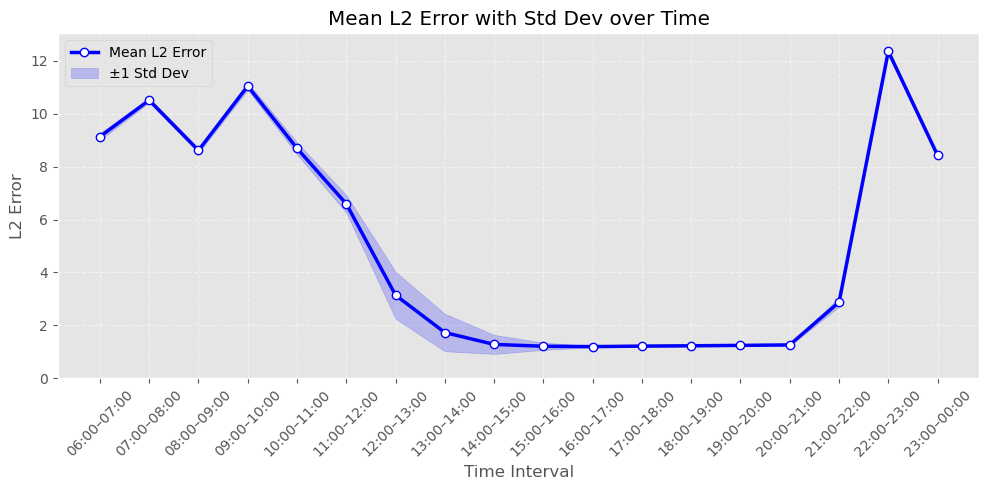

In [45]:
start_hour = 6 
t_range = 18
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(t_range)] 
errors_gru = list()
for i in range(len(actual_labels_gru)):
    pt = predict_graphs_gru[i][:,start_hour:start_hour+t_range]
    tl = actual_labels_gru[i][:,start_hour:start_hour+t_range]
    errors_gru.append(l2_error_ts(pt,tl))
errors_gru = np.array(errors_gru)

mean_err = errors_gru.mean(axis=0)  
std_err  = errors_gru.std(axis=0)  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(t_range), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(t_range),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(t_range))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_6_18_gru.png')

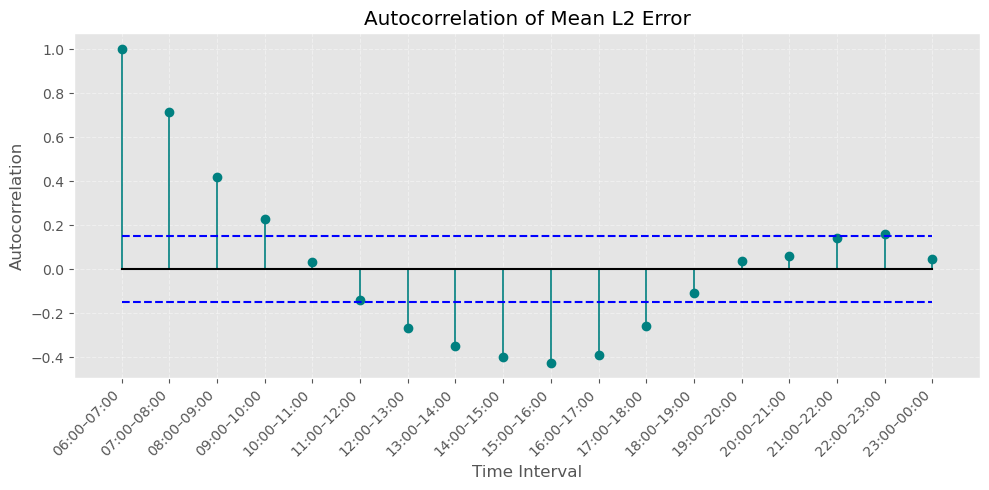

In [46]:
N = mean_err.size  
nlags = N - 1  
# ACF  
acf_vals = compute_acf(mean_err, nlags=nlags)  
lags     = np.arange(nlags + 1)  
#start_hour = 7  
time_labels = [  
    f"{(start_hour + i) % 24:02d}:00–{(start_hour + i + 1) % 24:02d}:00"  
    for i in range(N)  
]  
plt.style.use('ggplot')  
fig, ax = plt.subplots(figsize=(10, 5))  
markerline, stemlines, baseline = ax.stem(  
    lags, acf_vals,  
    linefmt='teal', markerfmt='o', basefmt='k-'  
)  
plt.setp(stemlines, 'linewidth', 1.2)  
plt.setp(markerline, 'markersize', 6)  
ax.set_xticks(lags)  
ax.set_xticklabels(time_labels, rotation=45, ha='right')  
plt.plot(lags,lags*0+0.15,color='blue',linestyle='--')
plt.plot(lags,lags*0-0.15,color='blue',linestyle='--')
ax.set_xlabel('Time Interval')  
ax.set_ylabel('Autocorrelation')  
ax.set_title('Autocorrelation of Mean L2 Error')    
ax.set_xlim(-1, nlags + 1)  
#ax.set_ylim(-1.1, 1.1)  
ax.grid(True, linestyle='--', alpha=0.4)  
plt.tight_layout()  
plt.savefig('acf_gru.png') 

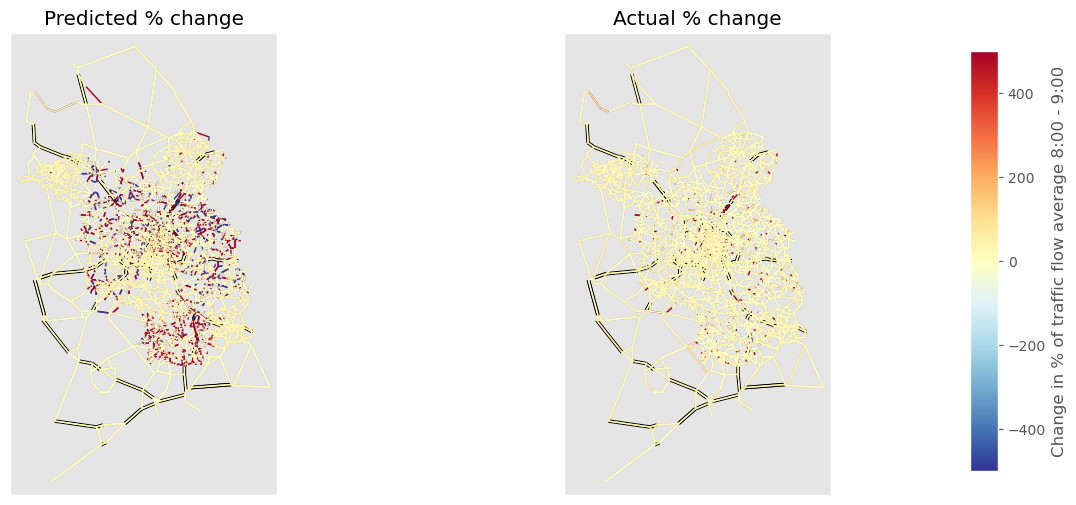

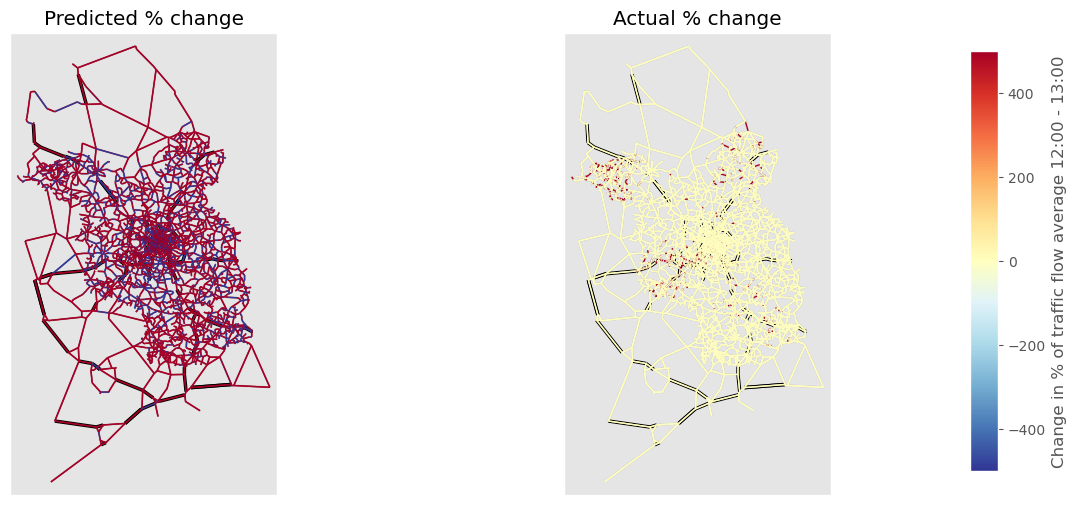

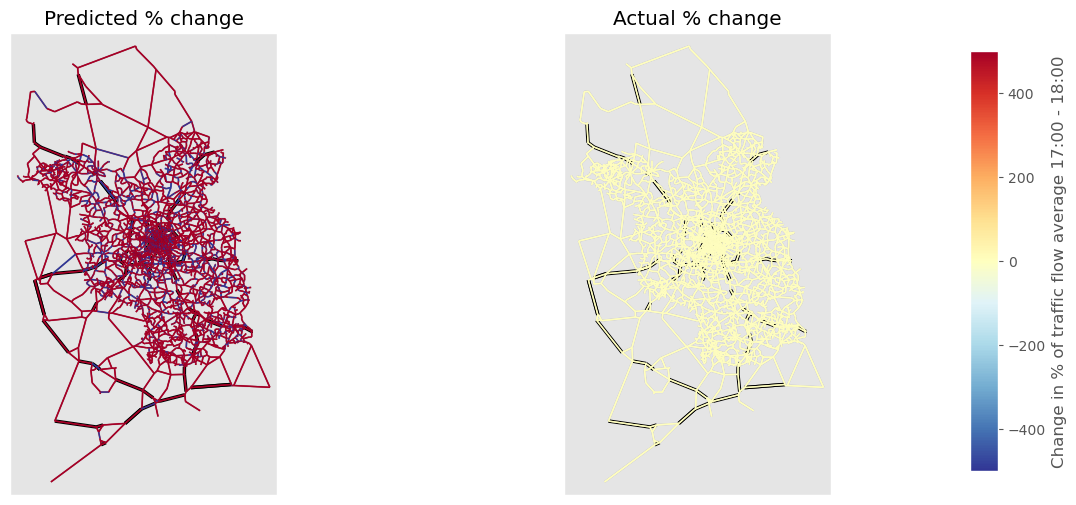

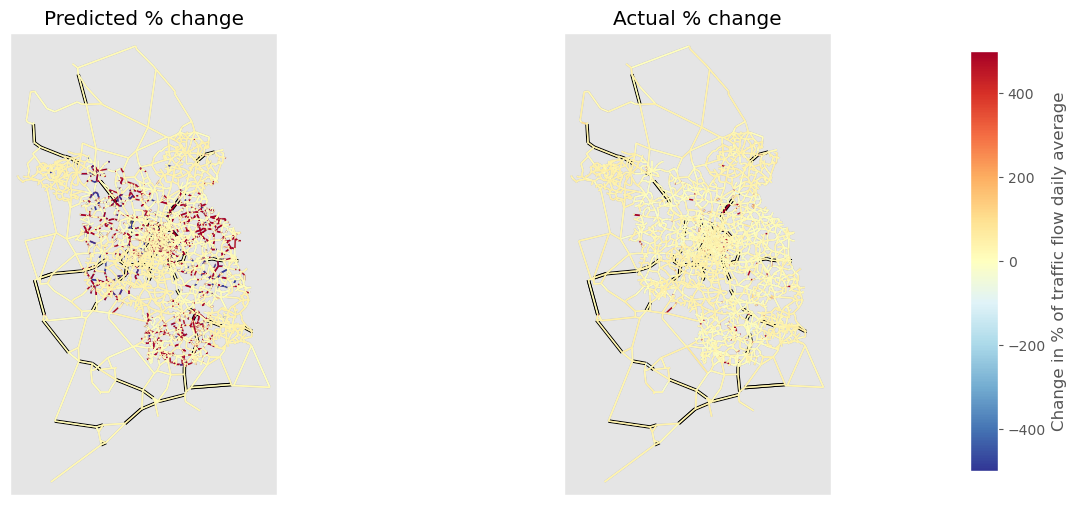

In [47]:
#network error reverse of logp1 (expm1)
index_t = [8,12,17,-1]
#gt = next(iter(val_ds_gru))[0]
for ti in index_t:
    c_title = f" average {ti}:00 - {ti+1}:00"
    if ti==-1 or ti==25:
        c_title = " daily average"
    #print(f"ti = {ti}")
    hsr_np = gt.node_sets['links']['base_hrs_avg'].numpy()[:,ti]
    hrs_pt = predict_graphs_gru[0][:,ti]
    hrs_lb = actual_labels_gru[0][:,ti]
    
    plot_policy_network_2panels(  
        net_xml_path="network.xml",  
        policy_links_txt="policy_roads_id_241.txt",  
        hrs_no_policy=hsr_np,   
        hrs_pred=np.expm1(hrs_pt),  
        hrs_real=np.expm1(hrs_lb),
        c_title=c_title
    )  



In [49]:
# NN

def build_regression_model_dense(input_tensor_spec,  
                                 output_tensor_spec,  
                                 hidden_dims=(64, 32),   # Number of neurons per layer 
                                 activation='relu',   
                                 dropout_rate=None):  
    """  
    A multi-layer Dense version of a time-series/multi-node regression model.

    Parameters
    ----
    input_tensor_spec : tf.TensorSpec
        Specification of the input tensor; shape = (None, num_node, T, feat)
    output_tensor_spec : tf.TensorSpec
        Specification of the output tensor; shape = (None, num_node, T, target_dim)
    hidden_dims : tuple
        Number of neurons in the hidden layers, e.g., (128, 64, 64)
    activation : str or callable
        Activation function for the Dense layers
    dropout_rate : float or None
        If not None, adds Dropout(dropout_rate) after each hidden layer
    """  
    
    
    # ---------- Input ----------  
    inp = tf.keras.layers.Input(type_spec=input_tensor_spec)  
    num_node = inp.shape[1]        # nodes  
    T        = inp.shape[2]        # times  
    feat_in  = inp.shape[3]        # input features  

    # ---------- Merge node into batch ----------  
    # (batch, num_node, T, feat) -> (batch*num_node, T, feat)  
    x = tf.keras.layers.Lambda(  
            lambda z: tf.reshape(z, (-1, T, feat_in)),  
            output_shape=(T, feat_in)  
        )(inp)  
    
    # ---------- Flatten time and features ----------  
    # (batch*num_node, T, feat) -> (batch*num_node, T*feat)  
    flat_dim = T * feat_in  
    x = tf.keras.layers.Flatten()(x)        # Equivalent to tf.reshape(-1, flat_dim)  

    # ---------- Stacking Dense hidden layers ----------  
    for units in hidden_dims:  
        x = tf.keras.layers.Dense(units, activation=activation)(x)  
        if dropout_rate is not None:  
            x = tf.keras.layers.Dropout(dropout_rate)(x)  
    
    # ---------- Output layer ----------  
    target_dim   = output_tensor_spec.shape[-1]  
    out_units    = T * target_dim            # Output target_dim at each time step.
    x = tf.keras.layers.Dense(out_units)(x)  # (batch*num_node, T*target_dim)  

    # ---------- Restore node/time dimension ----------  
    def split_nodes_and_time(z):  
        # Dynamic calculation batch_size  
        b = tf.shape(z)[0] // num_node  
        # (batch*num_node, T*target_dim) ->  
        # (batch, num_node, T, target_dim)  
        return tf.reshape(z, (b, num_node, T, target_dim))  

    out = tf.keras.layers.Lambda(  
            split_nodes_and_time,  
            output_shape=(num_node, T, target_dim)  
        )(x)  

    model = tf.keras.Model(inp, out)  
    return model  


In [50]:
#Deeper NN
#Dense
model_nn2 = build_regression_model_dense( input_tensor_spec = input_spec,output_tensor_spec =label_spec,hidden_dims = (32,64,128,64,32))
# Compile model
model_nn2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError()
    ]
)
model_nn2.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 27664, 25, 9)]    0         
                                                                 
 lambda_7 (Lambda)           (None, 25, 9)             0         
                                                                 
 flatten (Flatten)           (None, 225)               0         
                                                                 
 dense_13 (Dense)            (None, 32)                7232      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 64)                8256

In [51]:
# Train model
history_nn2 = model_nn2.fit(train_ds_batched_rnn, steps_per_epoch=10,epochs=200,validation_data=val_ds_batched_rnn)

Epoch 1/200
10/10 [==============================] - 2s 129ms/step - loss: 0.0217 - mean_absolute_error: 0.0846 - root_mean_squared_error: 0.1472 - val_loss: 0.0154 - val_mean_absolute_error: 0.0763 - val_root_mean_squared_error: 0.1242
Epoch 2/200
10/10 [==============================] - 1s 113ms/step - loss: 0.0132 - mean_absolute_error: 0.0770 - root_mean_squared_error: 0.1149 - val_loss: 0.0103 - val_mean_absolute_error: 0.0686 - val_root_mean_squared_error: 0.1015
Epoch 3/200
10/10 [==============================] - 1s 111ms/step - loss: 0.0087 - mean_absolute_error: 0.0619 - root_mean_squared_error: 0.0933 - val_loss: 0.0068 - val_mean_absolute_error: 0.0542 - val_root_mean_squared_error: 0.0824
Epoch 4/200
10/10 [==============================] - 1s 106ms/step - loss: 0.0058 - mean_absolute_error: 0.0486 - root_mean_squared_error: 0.0765 - val_loss: 0.0048 - val_mean_absolute_error: 0.0423 - val_root_mean_squared_error: 0.0689
Epoch 5/200
10/10 [==============================] -

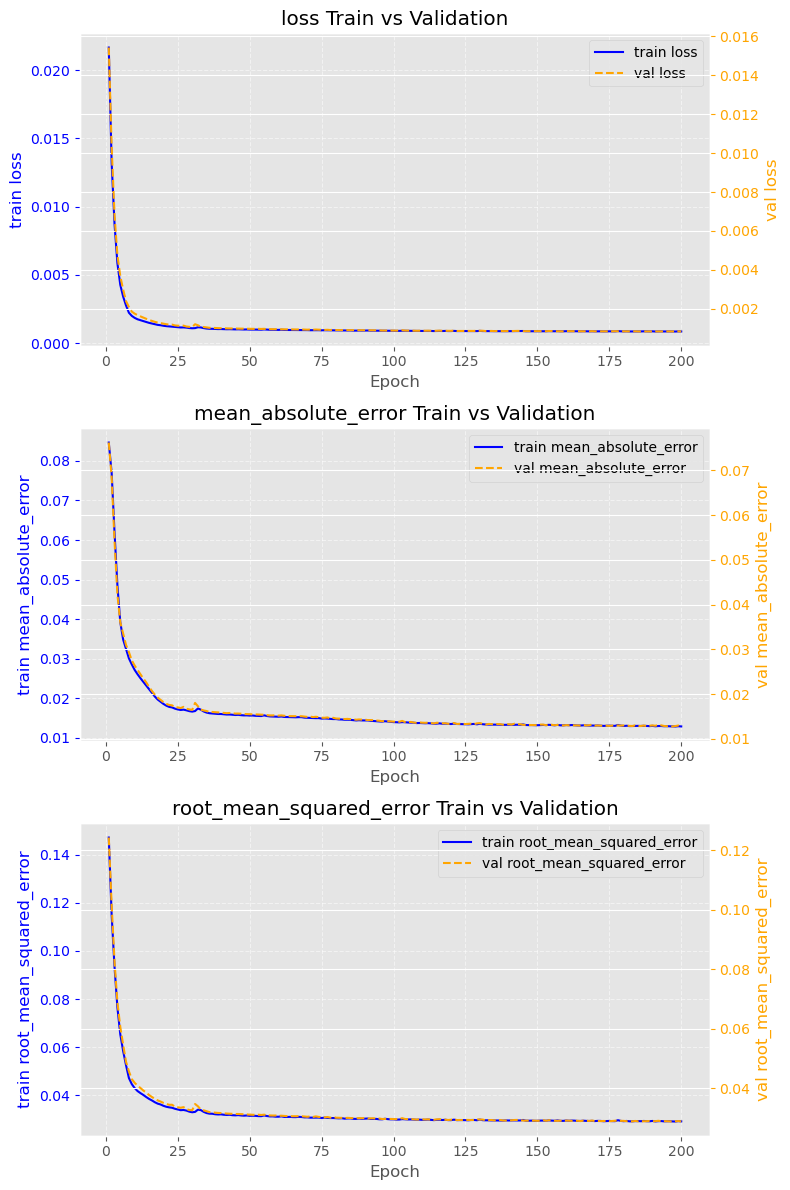

In [52]:
#plot
history_plot = history_nn2 
metrics = [m for m in history_plot.history if not m.startswith("val_")]  
n = len(metrics)  

fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), squeeze=False)  
for i, metric in enumerate(metrics):  
    val_metric = f"val_{metric}"  
    if val_metric not in history_plot.history:  
        continue  

    epochs = range(1, len(history_plot.history[metric]) + 1)  
    ax1 = axes[i, 0]  
    ax2 = ax1.twinx()  

    # train  
    ax1.plot(epochs, history_plot.history[metric],  
             color='blue',  label=f"train {metric}")  
    ax1.set_ylabel(f"train {metric}", color='blue')  
    ax1.tick_params(axis='y', colors='blue')  

    # val  
    ax2.plot(epochs, history_plot.history[val_metric],  
             color='orange',  label=f"val {metric}",linestyle="--")  
    ax2.set_ylabel(f"val {metric}", color='orange')  
    ax2.tick_params(axis='y', colors='orange')  

     
    ax1.set_xlabel("Epoch")  
    ax1.grid(True, linestyle="--", alpha=0.5)  
    lines = ax1.get_lines() + ax2.get_lines()  
    labels = [l.get_label() for l in lines]  
    ax1.legend(lines, labels, loc="best")  
    ax1.set_title(f"{metric} Train vs Validation")  

plt.tight_layout()  
plt.savefig('training_history_nn2.png')


CPU time for 10 predictions = 0.20365314185619354 s.
(10, 27664, 25, 1)
(10, 27664, 25, 1)


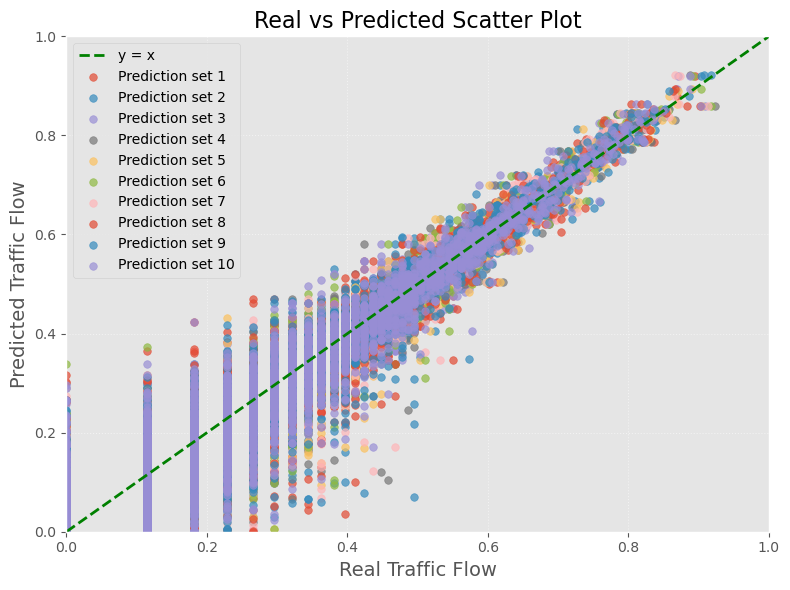

In [53]:
predict_graphs_nn2 = []
actual_labels_nn2 = []
val_ds_rnn = ds_val_rnn.take(10).batch(1).prefetch(tf.data.AUTOTUNE)
cpu_time = 0
# Generate prediction
for graph, labels in val_ds_rnn:
    t1 = time.perf_counter()
    predict_graph = model_nn2(graph)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_nn2.append(predict_graph.numpy())  # Save prediction results
    actual_labels_nn2.append(labels.numpy())  # Save actual labels
print(f'CPU time for 10 predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_nn2 = np.concatenate(predict_graphs_nn2, axis=0)
actual_labels_nn2 = np.concatenate(actual_labels_nn2, axis=0)
print(predict_graphs_nn2.shape)
print(actual_labels_nn2.shape)

save_plot_real_vs_pred_subsample(y_pred=predict_graphs_nn2,y_real=actual_labels_nn2,n_samples=800,filename='real_vs_pred_nn2.png')

In [54]:
predict_graphs_nn2 = []
actual_labels_nn2 = []
val_ds_nn2 = (
    ds_val_rnn       # (23, 25, 9)
    .batch(1)         # -> (1, 23, 25, 9)
    .prefetch(tf.data.AUTOTUNE)
)
cpu_time = 0
# Generate prediction
for inputs, labels in val_ds_nn2:
    t1 = time.perf_counter()
    predict_graph = model_nn2(inputs)  # Prediction
    t2 = time.perf_counter()
    cpu_time +=  (t2-t1)
    predict_graphs_nn2.append(predict_graph.numpy())  # Save prediction results
    actual_labels_nn2.append(labels.numpy())  # Save actual labels
print(f'CPU time for {len(data_val)} predictions = {cpu_time} s.')
# Convert to NumPy array
predict_graphs_nn2 = np.concatenate(predict_graphs_nn2, axis=0)
actual_labels_nn2 = np.concatenate(actual_labels_nn2, axis=0)

predict_graphs_nn2 = np.squeeze(predict_graphs_nn2,axis=-1)
actual_labels_nn2 = np.squeeze(actual_labels_nn2,axis=-1)


CPU time for 60 predictions = 1.1781358867883682 s.


MAPE = 20.542%
SMAPE = 167.641%
Median APE = 10.697%
WAPE = 22.659%


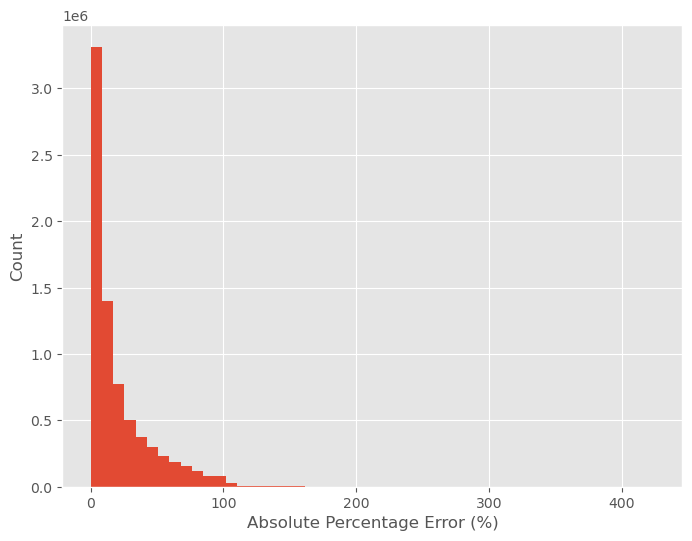

In [55]:
#error
y_true = np.asarray(actual_labels_nn2).ravel()  
y_pred = np.asarray(predict_graphs_nn2).ravel()
eps = 1e-8
mask = y_true != 0  
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
print(f"MAPE = {mape:.3f}%")  
smape = 2 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6)) * 100  
print(f"SMAPE = {smape:.3f}%")
ape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100    
median_ape = np.median(ape)  
print(f"Median APE = {median_ape:.3f}%")
wape = np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(y_true)) * 100  
print(f"WAPE = {wape:.3f}%")
fig = plt.figure(figsize=(8, 6))    
plt.hist(ape, bins=50)  
plt.xlabel("Absolute Percentage Error (%)")  
plt.ylabel("Count")  
plt.savefig('APE_nn2.png')


In [56]:
num = np.linalg.norm(y_true - y_pred, ord=2)  
den = np.linalg.norm(y_true,        ord=2)  
accuracy_l2 = 1 - num/(den + eps )     
print(f"Relative Accuracy (L2) = {accuracy_l2:.4f}  ({accuracy_l2*100:.2f}%)")  
ev = explained_variance_score(y_true, y_pred)  
print(f"Explained Variance (sklearn) = {ev:.4f}  ({ev*100:.2f}%)")
r2 = r2_score(y_true, y_pred)  
print(f"R² on test set: {r2:.4f} ({r2*100:.2f}%)")  


Relative Accuracy (L2) = 0.8071  (80.71%)
Explained Variance (sklearn) = 0.9567  (95.67%)
R² on test set: 0.9567 (95.67%)


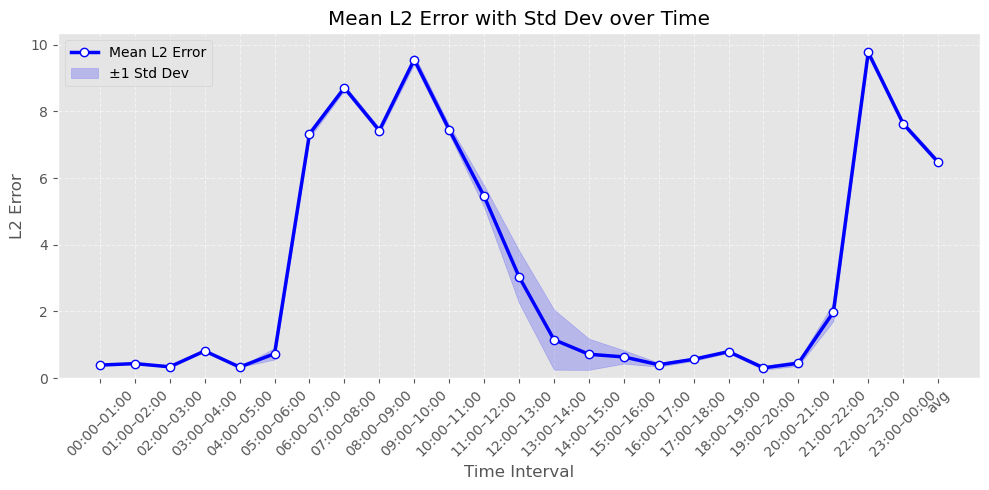

In [57]:
errors_nn2 = list()
for i in range(len(actual_labels_nn2)):
    pt = predict_graphs_nn2[i]
    tl = actual_labels_nn2[i]
    errors_nn2.append(l2_error_ts(pt,tl))
errors_nn2 = np.array(errors_nn2)
mean_err = errors_nn2.mean(axis=0)  
std_err  = errors_nn2.std(axis=0)  
start_hour = 0  
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(24)] + ["avg"]  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(25), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(25),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(25))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_nn2.png')


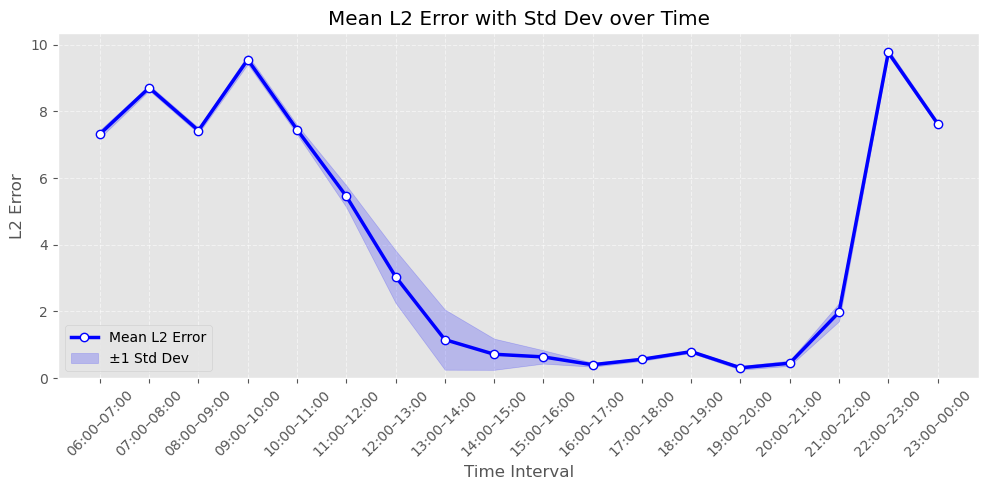

In [58]:
start_hour = 6
t_range = 18
time_labels = [f"{(start_hour+i)%24:02d}:00–{(start_hour+i+1)%24:02d}:00"  
               for i in range(t_range)] 
errors_nn2 = list()
for i in range(len(actual_labels_nn2)):
    pt = predict_graphs_nn2[i][:,start_hour:start_hour+t_range]
    tl = actual_labels_nn2[i][:,start_hour:start_hour+t_range]
    errors_nn2.append(l2_error_ts(pt,tl))
errors_nn2 = np.array(errors_nn2)

mean_err = errors_nn2.mean(axis=0)  
std_err  = errors_nn2.std(axis=0)  
fig, ax = plt.subplots(figsize=(10,5))  
plt.style.use('ggplot')  
ax.plot(range(t_range), mean_err,  
        color='blue', linewidth=2.5, marker='o',  
        markerfacecolor='white', label='Mean L2 Error')  
ax.fill_between(range(t_range),  
                mean_err - std_err,  
                mean_err + std_err,  
                color='blue', alpha=0.2, label='±1 Std Dev')  
ax.set_xticks(range(t_range))  
ax.set_xticklabels(time_labels, rotation=45)  
ax.set_ylim(bottom=0)  
ax.set_xlabel("Time Interval")  
ax.set_ylabel("L2 Error")  
ax.set_title("Mean L2 Error with Std Dev over Time")  
ax.legend()  
ax.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()  
plt.savefig('l2errors_6_18_nn2.png')

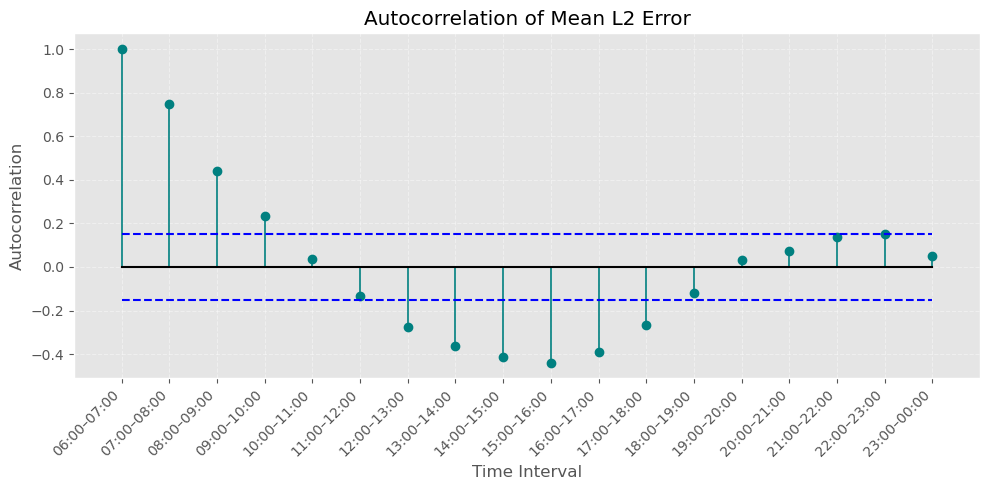

In [59]:
N = mean_err.size  
nlags = N - 1  
# ACF  
acf_vals = compute_acf(mean_err, nlags=nlags)  
lags     = np.arange(nlags + 1)  
#start_hour = 7  
time_labels = [  
    f"{(start_hour + i) % 24:02d}:00–{(start_hour + i + 1) % 24:02d}:00"  
    for i in range(N)  
]  
plt.style.use('ggplot')  
fig, ax = plt.subplots(figsize=(10, 5))  
markerline, stemlines, baseline = ax.stem(  
    lags, acf_vals,  
    linefmt='teal', markerfmt='o', basefmt='k-'  
)  
plt.setp(stemlines, 'linewidth', 1.2)  
plt.setp(markerline, 'markersize', 6)  
ax.set_xticks(lags)  
ax.set_xticklabels(time_labels, rotation=45, ha='right')  
plt.plot(lags,lags*0+0.15,color='blue',linestyle='--')
plt.plot(lags,lags*0-0.15,color='blue',linestyle='--')
ax.set_xlabel('Time Interval')  
ax.set_ylabel('Autocorrelation')  
ax.set_title('Autocorrelation of Mean L2 Error')    
ax.set_xlim(-1, nlags + 1)  
#ax.set_ylim(-1.1, 1.1)  
ax.grid(True, linestyle='--', alpha=0.4)  
plt.tight_layout()  
plt.savefig('acf_nn2.png')


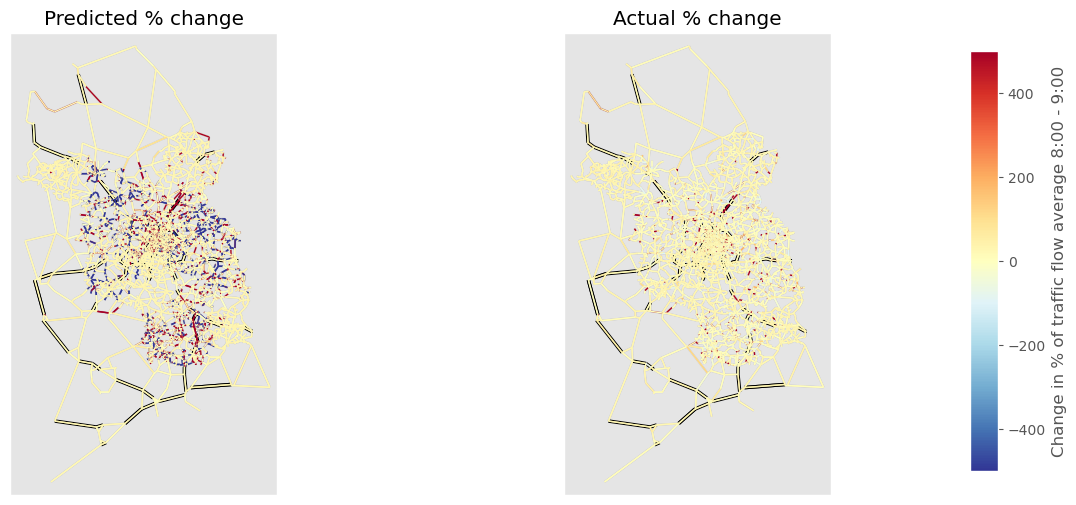

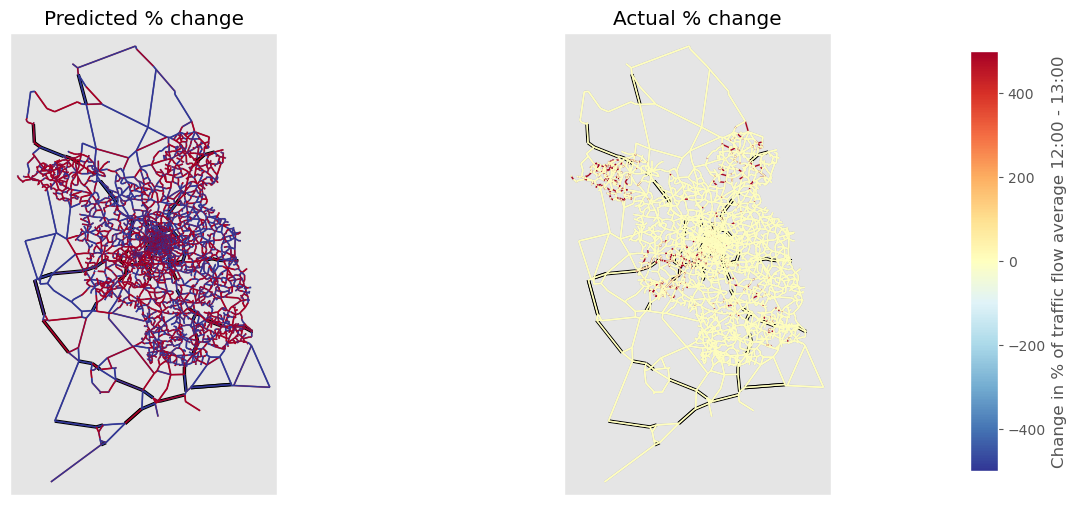

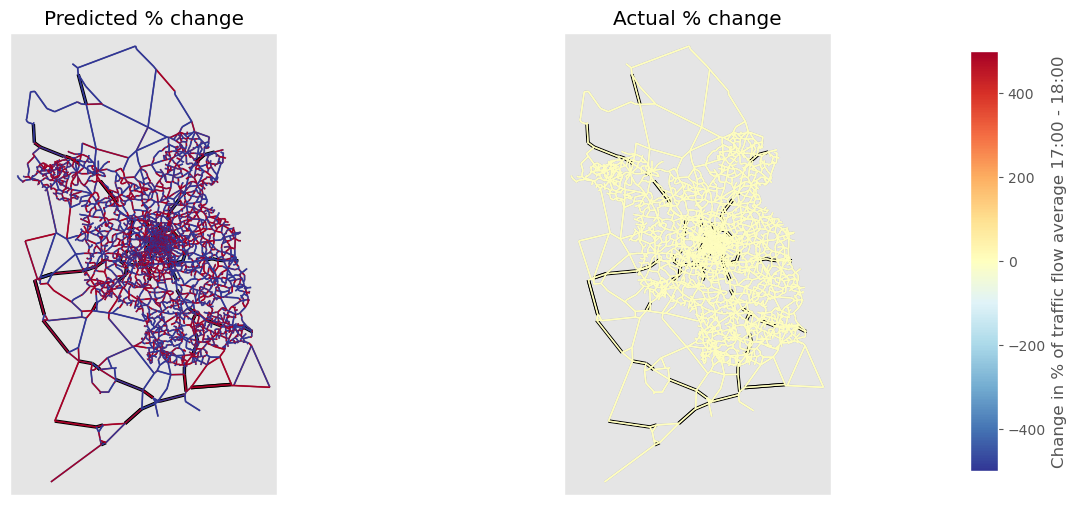

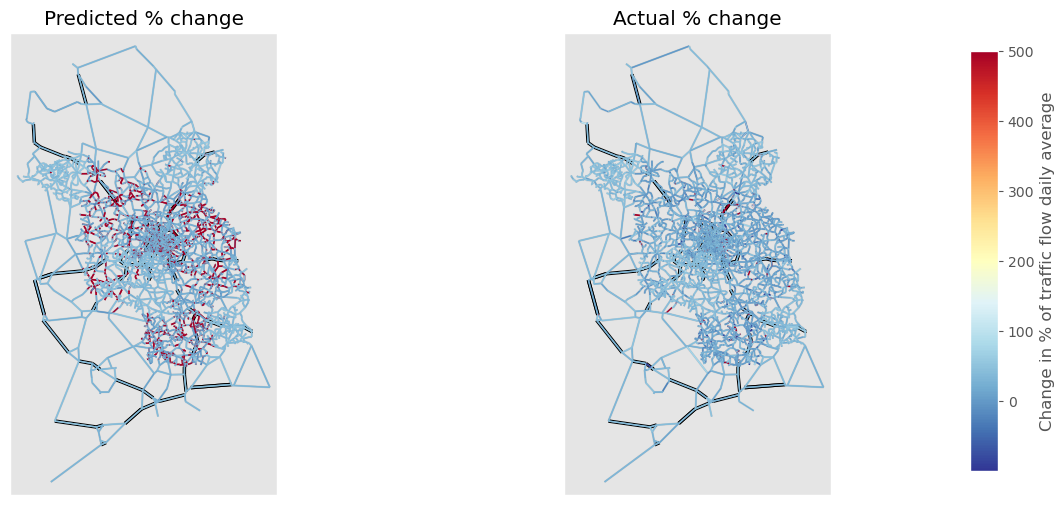

In [60]:
#network error reverse of logp1 (expm1)
index_t = [8,12,17,-1]
#gt = next(iter(val_ds_nn2))[0]
for ti in index_t:
    c_title = f" average {ti}:00 - {ti+1}:00"
    if ti==-1 or ti==25:
        c_title = " daily average"
    #print(f"ti = {ti}")
    hsr_np = gt.node_sets['links']['base_hrs_avg'].numpy()[:,ti]
    hrs_pt = predict_graphs_nn2[0][:,ti]
    hrs_lb = actual_labels_nn2[0][:,ti]
    
    save_plot_policy_network_2panels(  
        net_xml_path="network.xml",  
        policy_links_txt="policy_roads_id_241.txt",   
        hrs_no_policy=hsr_np,   
        hrs_pred=np.expm1(hrs_pt),  
        hrs_real=np.expm1(hrs_lb),
        c_title=c_title
    )  